<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Loading-features" data-toc-modified-id="1.-Loading-features-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. Loading features</a></span></li><li><span><a href="#2.-Splitting-data" data-toc-modified-id="2.-Splitting-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. Splitting data</a></span></li><li><span><a href="#3.--Bayesian-Optimization" data-toc-modified-id="3.--Bayesian-Optimization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3.  Bayesian Optimization</a></span></li><li><span><a href="#4.-definning-simple-model" data-toc-modified-id="4.-definning-simple-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>4. definning simple model</a></span></li><li><span><a href="#5.-Explicaciòn-del-modelo" data-toc-modified-id="5.-Explicaciòn-del-modelo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>5. Explicaciòn del modelo</a></span></li><li><span><a href="#5.-Validaciòn-del-Modelo" data-toc-modified-id="5.-Validaciòn-del-Modelo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>5. Validaciòn del Modelo</a></span></li></ul></div>

In [2]:
%load_ext autoreload
%autoreload 1
%aimport funciones

In [3]:
#Basics and internal
import pandas as pd
import numpy as np
from funciones import *
from calculate_stability_index import *
import wandb

#GraphViz
from IPython.display import Image
from six import StringIO
from sklearn import tree
import pydotplus

#Graphs and plottig
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

#sklearn model training model
from sklearn.tree import DecisionTreeClassifier
from bayes_opt import BayesianOptimization

#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from scipy import stats

#Sklearn metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import shap
import pickle

#settings
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

/opt/anaconda3/envs/krediya/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



### 1. Loading features

In [4]:
#X = pd.read_parquet('../../../Data/features/features_fraude.parquet')
#X = pd.read_parquet('../../../Data/features/features_fraude_tiendas.parquet')
#X = pd.read_parquet('../../../Data/features/fraude/features_tiendas_buro.parquet')
#X = pd.read_parquet('../../../Data/features/fraude/features_sin_buro.parquet')
#X = pd.read_parquet('../../../Data/features/fraude/final_fraud_dataset.parquet')
#X = pd.read_parquet('../../../Data/features/fraude/final_fraud_dataset_javi_complete.parquet')
X= pd.read_parquet('../../../Data/features/fraude/final_fraud_dataset_fix.parquet') #El que me enviò Christian porque n se estaba pasando el apc_score de cartera sino de buro.

In [4]:
#Validate duplicated data
X[X.index.duplicated()]

Empty DataFrame
Columns: [cedula, num_creditos, precio_equipo, monto_financiado, monto_abono, cuotas, monto_cuota, tiene_info_buro, fraude_financieras, vintage_buro, prob_incumplimiento, num_ref_canceladas, fallecido, num_dias_consultados, num_comercios_consultados, consultado_adelantos, num_consultas_adelantos, consultado_krediya, num_consultas_krediya, num_productos_dif_activos, num_total_productos_activos, monto_total_adeudado_sector, monto_prom_producto, monto_total_saldo_sector, saldo_promedio_prod_sector, max_dias_atraso_sector, cuota_prom_sector, monto_ultimo_pago_sector, target, mix_productos, productos_crediticios, otros_productos, porc_abono, marca_asus, marca_hp, marca_honor, marca_huawei, marca_infinix, marca_lg, marca_motorola, marca_nokia, marca_realme, marca_samsung, marca_tecno, marca_wiko, marca_xiaomi, zona_tiendas_chiriqui, zona_tiendas_chitre, zona_tiendas_colon, zona_tiendas_panama, zona_tiendas_panama_centro, zona_tiendas_panama_este, zona_tiendas_panama_norte, zona_tiendas_panama_oeste, zona_tiendas_provincia_central, zona_tiendas_provincias_centrales, rango_edad_18_años, rango_edad_19_años, rango_edad_20_años, rango_edad_21_años, rango_edad_22_a_25_años, rango_edad_26_a_30_años, rango_edad_31_a_35_años, rango_edad_36_a_40_años, rango_edad_41_a_45_años, rango_edad_46_a_50_años, rango_edad_51_a_55_años, rango_edad_56_a_60_años, rango_edad_61_a_65_años, rango_edad_66_a_70_años, rango_edad_71_a_75_años, rango_edad_mayor_75_años, gama_del_equipo, canal_multimarca, categoria_tienda_mala, tienda_no_categorizada, apc_score]
Index: []

In [6]:
X = X.fillna(0)

In [5]:
X.columns.sort_values().to_list()

['apc_score',
 'canal_multimarca',
 'categoria_tienda_mala',
 'cedula',
 'consultado_adelantos',
 'consultado_krediya',
 'cuota_prom_sector',
 'cuotas',
 'fallecido',
 'fraude_financieras',
 'gama_del_equipo',
 'marca_asus',
 'marca_honor',
 'marca_hp',
 'marca_huawei',
 'marca_infinix',
 'marca_lg',
 'marca_motorola',
 'marca_nokia',
 'marca_realme',
 'marca_samsung',
 'marca_tecno',
 'marca_wiko',
 'marca_xiaomi',
 'max_dias_atraso_sector',
 'mix_productos',
 'monto_abono',
 'monto_cuota',
 'monto_financiado',
 'monto_prom_producto',
 'monto_total_adeudado_sector',
 'monto_total_saldo_sector',
 'monto_ultimo_pago_sector',
 'num_comercios_consultados',
 'num_consultas_adelantos',
 'num_consultas_krediya',
 'num_creditos',
 'num_dias_consultados',
 'num_productos_dif_activos',
 'num_ref_canceladas',
 'num_total_productos_activos',
 'otros_productos',
 'porc_abono',
 'precio_equipo',
 'prob_incumplimiento',
 'productos_crediticios',
 'rango_edad_18_años',
 'rango_edad_19_años',
 'rango_

In [5]:
#Validate null data
X.isna().sum()

cedula                               0
num_creditos                         0
precio_equipo                        0
monto_financiado                     0
monto_abono                          0
cuotas                               0
monto_cuota                          0
tiene_info_buro                      0
fraude_financieras                   0
vintage_buro                         0
prob_incumplimiento                  0
num_ref_canceladas                   0
fallecido                            0
num_dias_consultados                 0
num_comercios_consultados            0
consultado_adelantos                 0
num_consultas_adelantos              0
consultado_krediya                   0
num_consultas_krediya                0
num_productos_dif_activos            0
num_total_productos_activos          0
monto_total_adeudado_sector          0
monto_prom_producto                  0
monto_total_saldo_sector             0
saldo_promedio_prod_sector           0
max_dias_atraso_sector   

In [29]:
#Eliminando las variables que tenian un CSI alto (fallecido) y un KS statdìstico alto. 
#Al eliminarlas, se entrena un modelo malisimo con un AUC de 0.62 y un decil, solo tiene un unico nodo.

'''
X.drop(columns=['fallecido']
       , inplace=True)

to_drop_becaue_Ks = ['monto_abono', 'monto_cuota', 'monto_financiar', 'precio del equipo']

X.drop(columns=to_drop_becaue_Ks,
      inplace=True)
'''

In [5]:
#Dataframe concatenado by Chris: Esto aplica para el dataset final_fraud_dataset y final_fraud_dataset_fix

X.set_index('cedula', inplace=True)
X.drop(columns=['categoria_tienda_mala',
                'tienda_no_categorizada',
                'fraude_financieras']
       , inplace=True)


In [7]:
#X = pd.read_csv('../Data/features/krediya_data.csv')
#X = X.drop(columns=['Unnamed: 0'])

In [6]:
y = X[['target']]
X = X.drop(columns=['target'])

In [42]:
#Se ejecuta para buscar un string en toda la base. Habia un valor de "No" que agregaba ruido al anàlisis

substring = 'ORGUZ ACTIVACIONES'
X.columns[X.isin([substring]).any()] 

Index([], dtype='object')

In [74]:
list(X.columns)

['apc_score',
 '%_abono',
 'monto_abono',
 'monto_cuota',
 'numero_cuotas',
 'monto_financiar',
 'precio del equipo',
 'marca_asus',
 'marca_hp',
 'marca_honor',
 'marca_huawei',
 'marca_infinix',
 'marca_lg',
 'marca_motorola',
 'marca_nokia',
 'marca_realme',
 'marca_samsung',
 'marca_tecno',
 'marca_wiko',
 'marca_xiaomi',
 'zona tiendas mm_chiriqui',
 'zona tiendas mm_chitre',
 'zona tiendas mm_colon',
 'zona tiendas mm_panama',
 'zona tiendas mm_panama centro',
 'zona tiendas mm_panama este',
 'zona tiendas mm_panama norte',
 'zona tiendas mm_panama oeste',
 'zona tiendas mm_provincia central',
 'zona tiendas mm_provincias centrales',
 'rango de edad_18 años',
 'rango de edad_19 años',
 'rango de edad_20 años',
 'rango de edad_21 años',
 'rango de edad_22 a 25 años',
 'rango de edad_26 a 30 años',
 'rango de edad_31 a 35 años',
 'rango de edad_36 a 40 años',
 'rango de edad_41 a 45 años',
 'rango de edad_46 a 50 años',
 'rango de edad_51 a 55 años',
 'rango de edad_56 a 60 años',


### 1.1. Features to PoC with Krediya. Esto solo se ejecuta cuando se vaya a proba el API, ya que solo cuenta con estas features

In [290]:
'''
features_PoC = (
[
     'Gama del Equipo',
     'Marca_Asus',
     'Marca_HP',
     'Marca_Honor',
     'Marca_Huawei',
     'Marca_Infinix',
     'Marca_Lg',
     'Marca_Motorola',
     'Marca_Nokia',
     'Marca_Realme',
     'Marca_Samsung',
     'Marca_Tecno',
     'Marca_Wiko',
     'Marca_Xiaomi',
     'Zona tiendas MM_CHIRIQUI',
     'Zona tiendas MM_CHITRE',
     'Zona tiendas MM_COLON',
     'Zona tiendas MM_PANAMA',
     'Zona tiendas MM_PANAMA CENTRO',
     'Zona tiendas MM_PANAMA ESTE',
     'Zona tiendas MM_PANAMA NORTE',
     'Zona tiendas MM_PANAMA OESTE',
     'Zona tiendas MM_PROVINCIA CENTRAL',
     'Zona tiendas MM_PROVINCIAS CENTRALES',
     'APC_Score',
     '% Abono',
     'Monto de Abono',
     'Monto de la Cuota',
     'Numero de Cuotas',
     'Monto_Financiar',
     'Precio del Equipo',
     'Gama del Equipo',
     'Canal_Multimarca'
]
)
'''

In [75]:
#X = X[features_PoC]

In [ ]:
# Se elimina esta variable por Data leakage
#X = X.drop(columns=['fraude_adelantos'])

In [10]:
y.target.value_counts()

0    62629
1    10467
Name: target, dtype: int64

In [11]:
y.target.value_counts(normalize=True)

0    0.856805
1    0.143195
Name: target, dtype: float64

### 2. Splitting data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [8]:
X_train.shape, X_test.shape

((51167, 72), (21929, 72))

In [9]:
y_train.target.value_counts()

0    43840
1     7327
Name: target, dtype: int64

In [48]:
y_test.target.value_counts()

0    19314
1     2615
Name: target, dtype: int64

In [23]:
X_train.shape, X_test.shape

((51167, 72), (21929, 72))

### 3.  Bayesian Optimization and training model

In [28]:
def features_for_decision_tree(k):
    
    selector = SelectKBest(f_classif,k=k)
    selected_features = selector.fit_transform(X_train, y_train.target.values)
    f_score_indexes = (-selector.scores_).argsort()[:k]
    X_train_ = X_train.iloc[:,f_score_indexes]
    X_test_  = X_test.iloc[:,f_score_indexes]
    return X_train_, X_test_

In [15]:
def train_and_evaluate(max_depth, min_samples_split, min_samples_leaf, max_leaf_nodes, min_impurity_decrease):
    """Function we want to maximize (Black box)

    It first trains a model with the training set using the received hyper 
    parameterts, and then evaluates and returns the accuracy over the test set.
    """
    
    k = 0 #Solo para feature selection. Se deja en cero, ya que el feature selection no està aportando nada
    
    np.random.seed(1234)
    
    # Algunos parámetros deben ser enteros, optimización bayesiana no se encarga de eso.... 
    # Algo tenía que tener malo
    k = int(k)
    
    max_depth = int(round(max_depth))
    min_samples_split = int(round(min_samples_split))
    min_samples_leaf = int(round(min_samples_leaf))
    max_leaf_nodes = int(round(max_leaf_nodes))

    print(f"Evaluando depth:{max_depth}, min_samples_split:{min_samples_split},",
          f"min_samples_leaf:{min_samples_leaf} y max_leaf_nodes:{max_leaf_nodes},",
          f"con k: {k}")

    # Definición y entrenamiento del modelo
    modelo = DecisionTreeClassifier(
        max_depth = max_depth,
        min_samples_split = min_samples_split,
        min_samples_leaf = min_samples_leaf,
        max_leaf_nodes = max_leaf_nodes,
        min_impurity_decrease = min_impurity_decrease,
    )
    
    #Entrenamiento normal
    X_training = X_train.copy() 
    X_testing =  X_test.copy()
    
    if k!=0:
        #Entrenamiento con feature selection
        X_training, X_testing = features_for_decision_tree(k)

    modelo.fit(X_training, y_train)

    # Predicción de train y test, evaluación con AUC
    predict_proba_train = modelo.predict_proba(X_training)[:, 1]    
    predict_proba_test  = modelo.predict_proba(X_testing)[:, 1]
    
    auc_train = roc_auc_score(y_train, predict_proba_train).round(2)
    auc_test = roc_auc_score(y_test,predict_proba_test ).round(2)
    print(f" AUC de train/test son {auc_train:.3f}/{auc_test:.3f}")
    
    return auc_test

In [16]:
train_and_evaluate( 5, 20, 10, 50, 0.1)

Evaluando depth:5, min_samples_split:20, min_samples_leaf:10 y max_leaf_nodes:50, con k: 0
 AUC de train/test son 0.500/0.500


0.5

In [17]:
### Enviados por Javi

m = X.shape[1]

pbounds = {
    #'k': (10, m-2),                    # K: Controla la selecciòn de variables para entrenar
    'max_depth':(3,7),                 # prepoda: controla la profundidad del árbol (largo máximo de las ramas)
    'min_samples_split': (5,  300),    # prepoda: el mínimo número de registros necesarios para crear una nueva rama
    'min_samples_leaf':  (5,  200),    # prepoda: el mínimo número de registros en una hoja
    'max_leaf_nodes':    (20, 100),    # prepoda: máximo número de nodos hojas
    'min_impurity_decrease': (0.0, 10) # prepoda: umbral mínimo de reducción de la impureza para aceptar la creación de una rama
}

In [18]:
optimizer = BayesianOptimization(
    f=train_and_evaluate,
    pbounds=pbounds,
    random_state=1,
    verbose=2
)

In [19]:
%%time 
optimizer.maximize(
    init_points=20,
    n_iter=200,
)

|   iter    |  target   | max_depth | max_le... | min_im... | min_sa... | min_sa... |
-------------------------------------------------------------------------------------
Evaluando depth:5, min_samples_split:48, min_samples_leaf:64 y max_leaf_nodes:78, con k: 0
 AUC de train/test son 0.630/0.620
|  1        |  0.62     |  4.668    |  77.63    |  0.001144 |  63.95    |  48.29    |
Evaluando depth:3, min_samples_split:164, min_samples_leaf:82 y max_leaf_nodes:35, con k: 0
 AUC de train/test son 0.500/0.500
|  2        |  0.5      |  3.369    |  34.9     |  3.456    |  82.37    |  164.0    |
Evaluando depth:5, min_samples_split:13, min_samples_leaf:176 y max_leaf_nodes:75, con k: 0
 AUC de train/test son 0.500/0.500
|  3        |  0.5      |  4.677    |  74.82    |  2.045    |  176.2    |  13.08    |
Evaluando depth:6, min_samples_split:63, min_samples_leaf:32 y max_leaf_nodes:53, con k: 0
 AUC de train/test son 0.500/0.500
|  4        |  0.5      |  5.682    |  53.38    |  5.587    |  3

In [20]:
optimizer.max

{'target': 0.67,
 'params': {'max_depth': 6.8840045959721134,
  'max_leaf_nodes': 44.596510978407906,
  'min_impurity_decrease': 0.0001701525878783361,
  'min_samples_leaf': 182.47277394896665,
  'min_samples_split': 150.2221680450833}}

In [54]:
#Best parameter final model presente to Javi 10 August 2022. Sin variables descartadas por Ks"Sam
best = optimizer.max['params']
best

{'k': 0.0,
 'max_depth': 3.6073063308094753,
 'max_leaf_nodes': 24.301408329814358,
 'min_impurity_decrease': 0.0026724539169886707,
 'min_samples_leaf': 10.052896388170588,
 'min_samples_split': 15.246319157282498}

In [916]:
#Best parameter final model presente to Javi 10 August 2022. Sin variable "fallecido"
best = optimizer.max['params']
best

{'max_depth': 6.8840045959721134,
 'max_leaf_nodes': 44.596510978407906,
 'min_impurity_decrease': 0.0001701525878783361,
 'min_samples_leaf': 182.47277394896665,
 'min_samples_split': 150.2221680450833}

In [530]:
#Best parameter final model presente to Javi 10 August 2022
best = optimizer.max['params']
best

{'max_depth': 6.8840045959721134,
 'max_leaf_nodes': 44.596510978407906,
 'min_impurity_decrease': 0.0001701525878783361,
 'min_samples_leaf': 182.47277394896665,
 'min_samples_split': 150.2221680450833}

In [21]:
#Best parameter final model presente to Javi 10 August 2022. con el dataset final_fraud_dataset_fix, se ajusta apc_score de cartera
best = optimizer.max['params']
best

{'max_depth': 6.8840045959721134,
 'max_leaf_nodes': 44.596510978407906,
 'min_impurity_decrease': 0.0001701525878783361,
 'min_samples_leaf': 182.47277394896665,
 'min_samples_split': 150.2221680450833}

In [55]:
#Best parameter final model with new sub variables n X
best = optimizer.max['params']
best

{'max_depth': 6.8840045959721134,
 'max_leaf_nodes': 44.596510978407906,
 'min_impurity_decrease': 0.0001701525878783361,
 'min_samples_leaf': 182.47277394896665,
 'min_samples_split': 150.2221680450833}

In [963]:
#Best parameter model with k dynamic
best = optimizer.max['params']
best

{'k': 33.77025426804671,
 'max_depth': 5.881297973768632,
 'max_leaf_nodes': 20.00914998538759,
 'min_impurity_decrease': 3.0233257263183977,
 'min_samples_leaf': 33.61739870933704,
 'min_samples_split': 32.23988545679535}

In [55]:
# Modelos ajustado por strategy de Javier sin la variable "fallecido" ni las variables descartadas por KS2Sam
modelo = DecisionTreeClassifier(
    max_depth = round(best['max_depth']),
    max_leaf_nodes = round(best['max_leaf_nodes']),
    min_impurity_decrease = best['min_impurity_decrease'],
    min_samples_leaf = round(best['min_samples_leaf']),
    min_samples_split = round(best['min_samples_split']),
)
modelo.fit(X_train, y_train)

# Predicción de train y test, evaluación con AUC
predict_proba_train = modelo.predict_proba(X_train)[:, 1]    
predict_proba_test  = modelo.predict_proba(X_test)[:, 1]
auc_train = roc_auc_score(y_train, predict_proba_train).round(2)
auc_test = roc_auc_score(y_test,predict_proba_test ).round(2)
print(f" AUC de train/test son {auc_train:.3f}/{auc_test:.3f}")

 AUC de train/test son 0.590/0.590


In [917]:
# Modelos ajustado por strategy de Javier sin la variable "fallecido" por CSI
modelo = DecisionTreeClassifier(
    max_depth = round(best['max_depth']),
    max_leaf_nodes = round(best['max_leaf_nodes']),
    min_impurity_decrease = best['min_impurity_decrease'],
    min_samples_leaf = round(best['min_samples_leaf']),
    min_samples_split = round(best['min_samples_split']),
)
modelo.fit(X_train, y_train)

# Predicción de train y test, evaluación con AUC
predict_proba_train = modelo.predict_proba(X_train)[:, 1]    
predict_proba_test  = modelo.predict_proba(X_test)[:, 1]
auc_train = roc_auc_score(y_train, predict_proba_train).round(2)
auc_test = roc_auc_score(y_test,predict_proba_test ).round(2)
print(f" AUC de train/test son {auc_train:.3f}/{auc_test:.3f}")

 AUC de train/test son 0.660/0.660


In [532]:
# Modelo originalmente presetado a Javi el 20 Agosto 2022
modelo = DecisionTreeClassifier(
    max_depth = round(best['max_depth']),
    max_leaf_nodes = round(best['max_leaf_nodes']),
    min_impurity_decrease = best['min_impurity_decrease'],
    min_samples_leaf = round(best['min_samples_leaf']),
    min_samples_split = round(best['min_samples_split']),
)
modelo.fit(X_train, y_train)

# Predicción de train y test, evaluación con AUC
predict_proba_train = modelo.predict_proba(X_train)[:, 1]    
predict_proba_test  = modelo.predict_proba(X_test)[:, 1]
auc_train = roc_auc_score(y_train, predict_proba_train).round(2)
auc_test = roc_auc_score(y_test,predict_proba_test ).round(2)
print(f" AUC de train/test son {auc_train:.3f}/{auc_test:.3f}")

 AUC de train/test son 0.670/0.660


In [22]:
# Modelo originalmente presetado a Javi el 20 Agosto 2022. con el dataset final_fraud_dataset_fix, se ajusta apc_score de cartera
modelo = DecisionTreeClassifier(
    max_depth = round(best['max_depth']),
    max_leaf_nodes = round(best['max_leaf_nodes']),
    min_impurity_decrease = best['min_impurity_decrease'],
    min_samples_leaf = round(best['min_samples_leaf']),
    min_samples_split = round(best['min_samples_split']),
)
modelo.fit(X_train, y_train)

# Predicción de train y test, evaluación con AUC
predict_proba_train = modelo.predict_proba(X_train)[:, 1]    
predict_proba_test  = modelo.predict_proba(X_test)[:, 1]
auc_train = roc_auc_score(y_train, predict_proba_train).round(2)
auc_test = roc_auc_score(y_test,predict_proba_test ).round(2)
print(f" AUC de train/test son {auc_train:.3f}/{auc_test:.3f}")

 AUC de train/test son 0.690/0.670


In [56]:
# New variables Javi
modelo = DecisionTreeClassifier(
    max_depth = round(best['max_depth']),
    max_leaf_nodes = round(best['max_leaf_nodes']),
    min_impurity_decrease = best['min_impurity_decrease'],
    min_samples_leaf = round(best['min_samples_leaf']),
    min_samples_split = round(best['min_samples_split']),
)
modelo.fit(X_train, y_train)

# Predicción de train y test, evaluación con AUC
predict_proba_train = modelo.predict_proba(X_train)[:, 1]    
predict_proba_test  = modelo.predict_proba(X_test)[:, 1]
auc_train = roc_auc_score(y_train, predict_proba_train).round(2)
auc_test = roc_auc_score(y_test,predict_proba_test ).round(2)
print(f" AUC de train/test son {auc_train:.3f}/{auc_test:.3f}")

 AUC de train/test son 0.660/0.660


In [964]:
# Modelos con k dynamic
modelo = DecisionTreeClassifier(
    max_depth = round(best['max_depth']),
    max_leaf_nodes = round(best['max_leaf_nodes']),
    min_impurity_decrease = best['min_impurity_decrease'],
    min_samples_leaf = round(best['min_samples_leaf']),
    min_samples_split = round(best['min_samples_split']),
)
modelo.fit(X_train, y_train)

# Predicción de train y test, evaluación con AUC
predict_proba_train = modelo.predict_proba(X_train)[:, 1]    
predict_proba_test  = modelo.predict_proba(X_test)[:, 1]
auc_train = roc_auc_score(y_train, predict_proba_train).round(2)
auc_test = roc_auc_score(y_test,predict_proba_test ).round(2)
print(f" AUC de train/test son {auc_train:.3f}/{auc_test:.3f}")

 AUC de train/test son 0.500/0.500


## 4. Graph Decision Tree and Shapley values

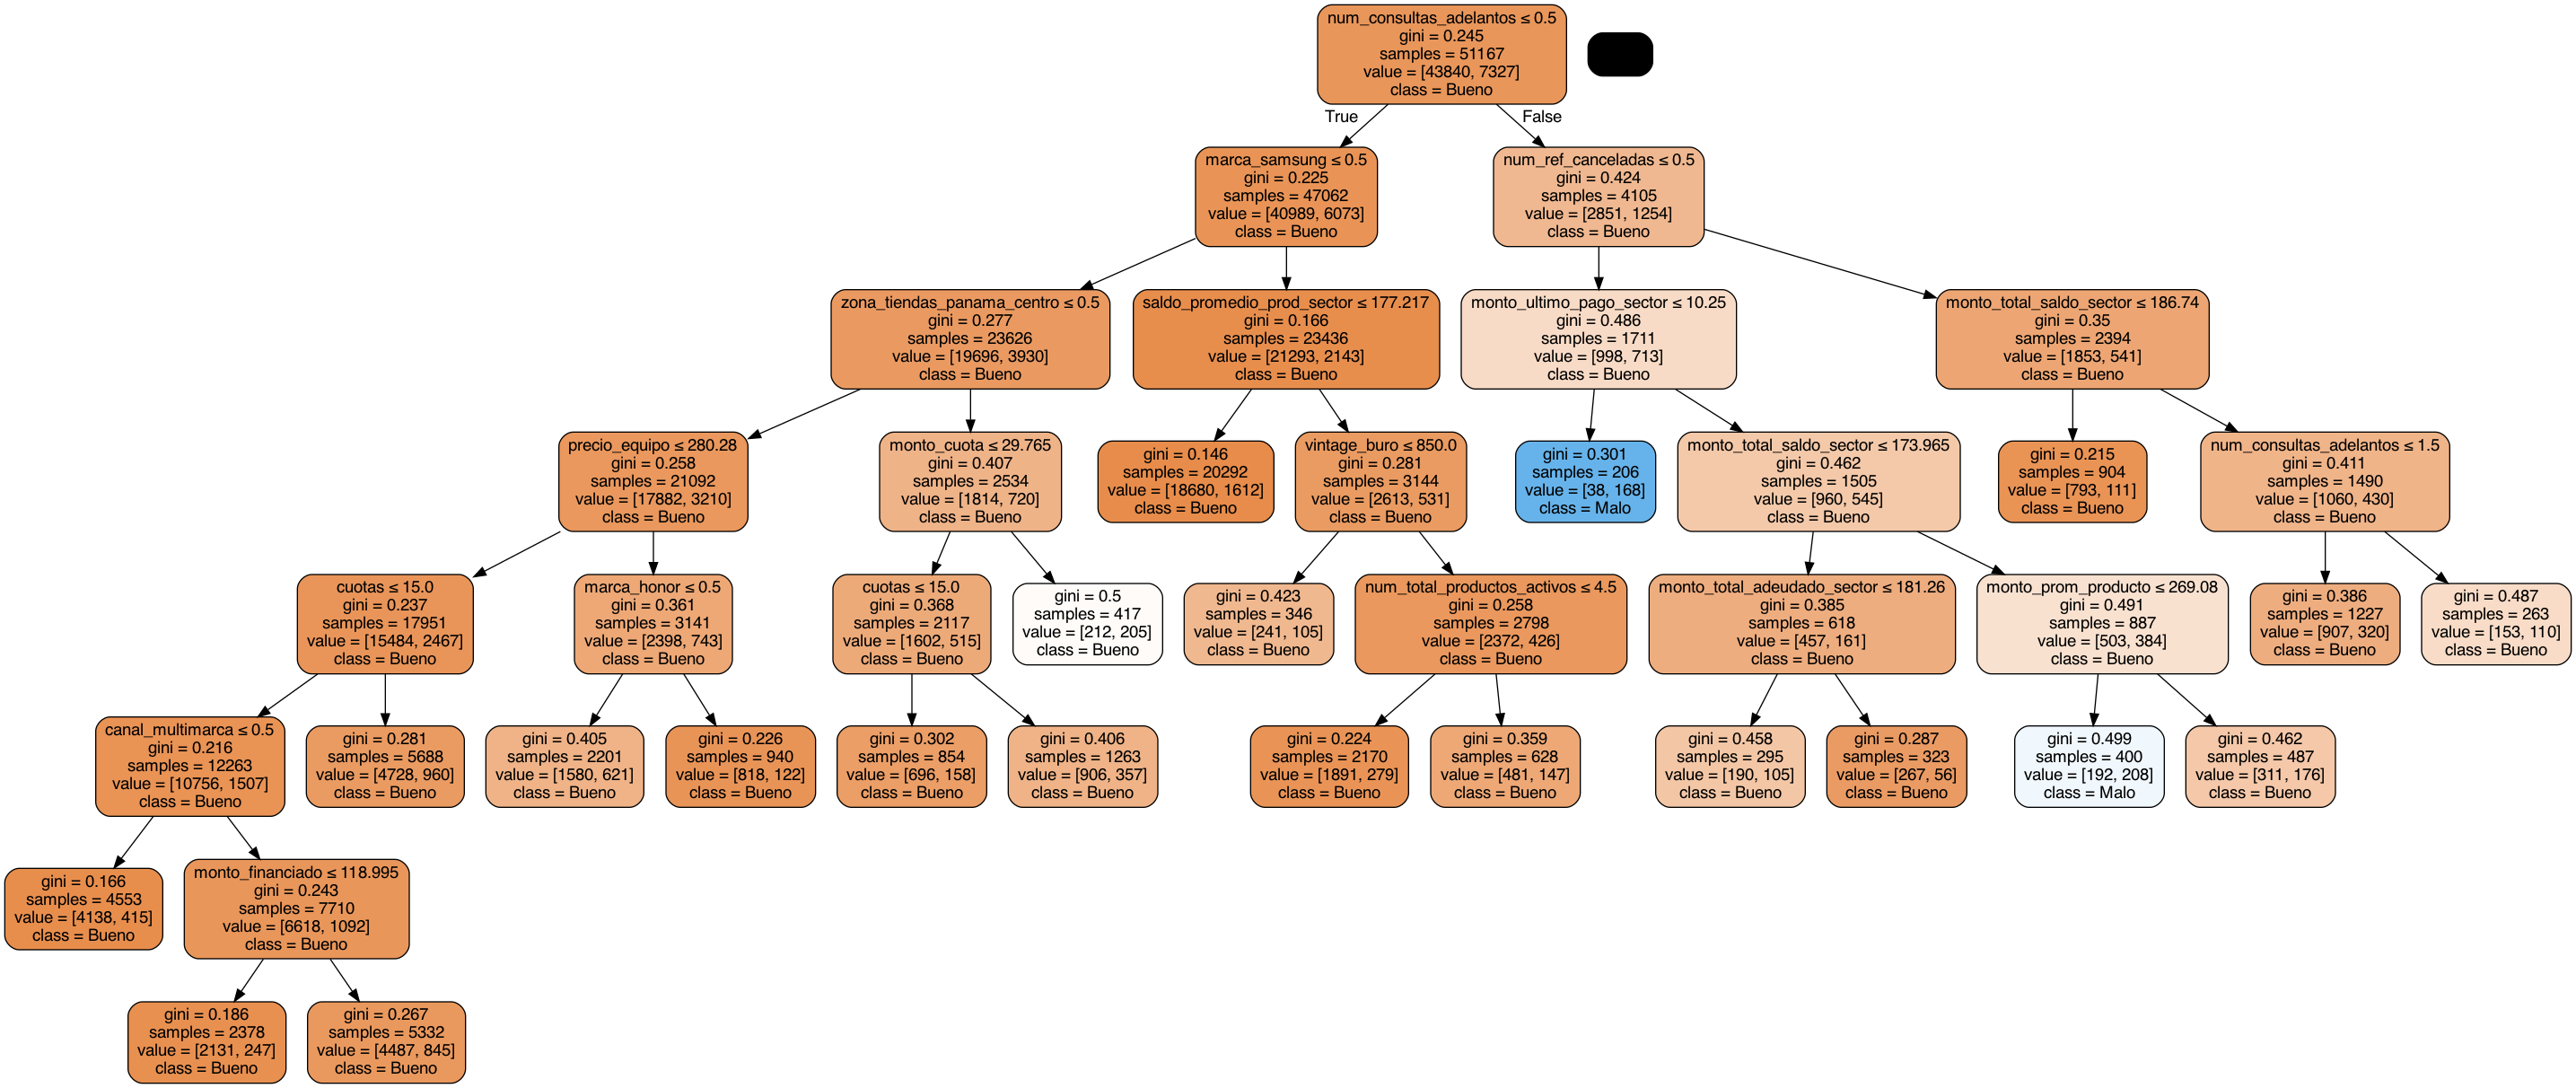

In [533]:
# Modelo presentado a Javier
dot_data = StringIO()
tree.export_graphviz(modelo, 
                     filled=True, rounded=True,  #nodos redondeados y coloreados
                     class_names=['Bueno','Malo'],
                     feature_names=X_train.columns,  
                     out_file=dot_data,
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

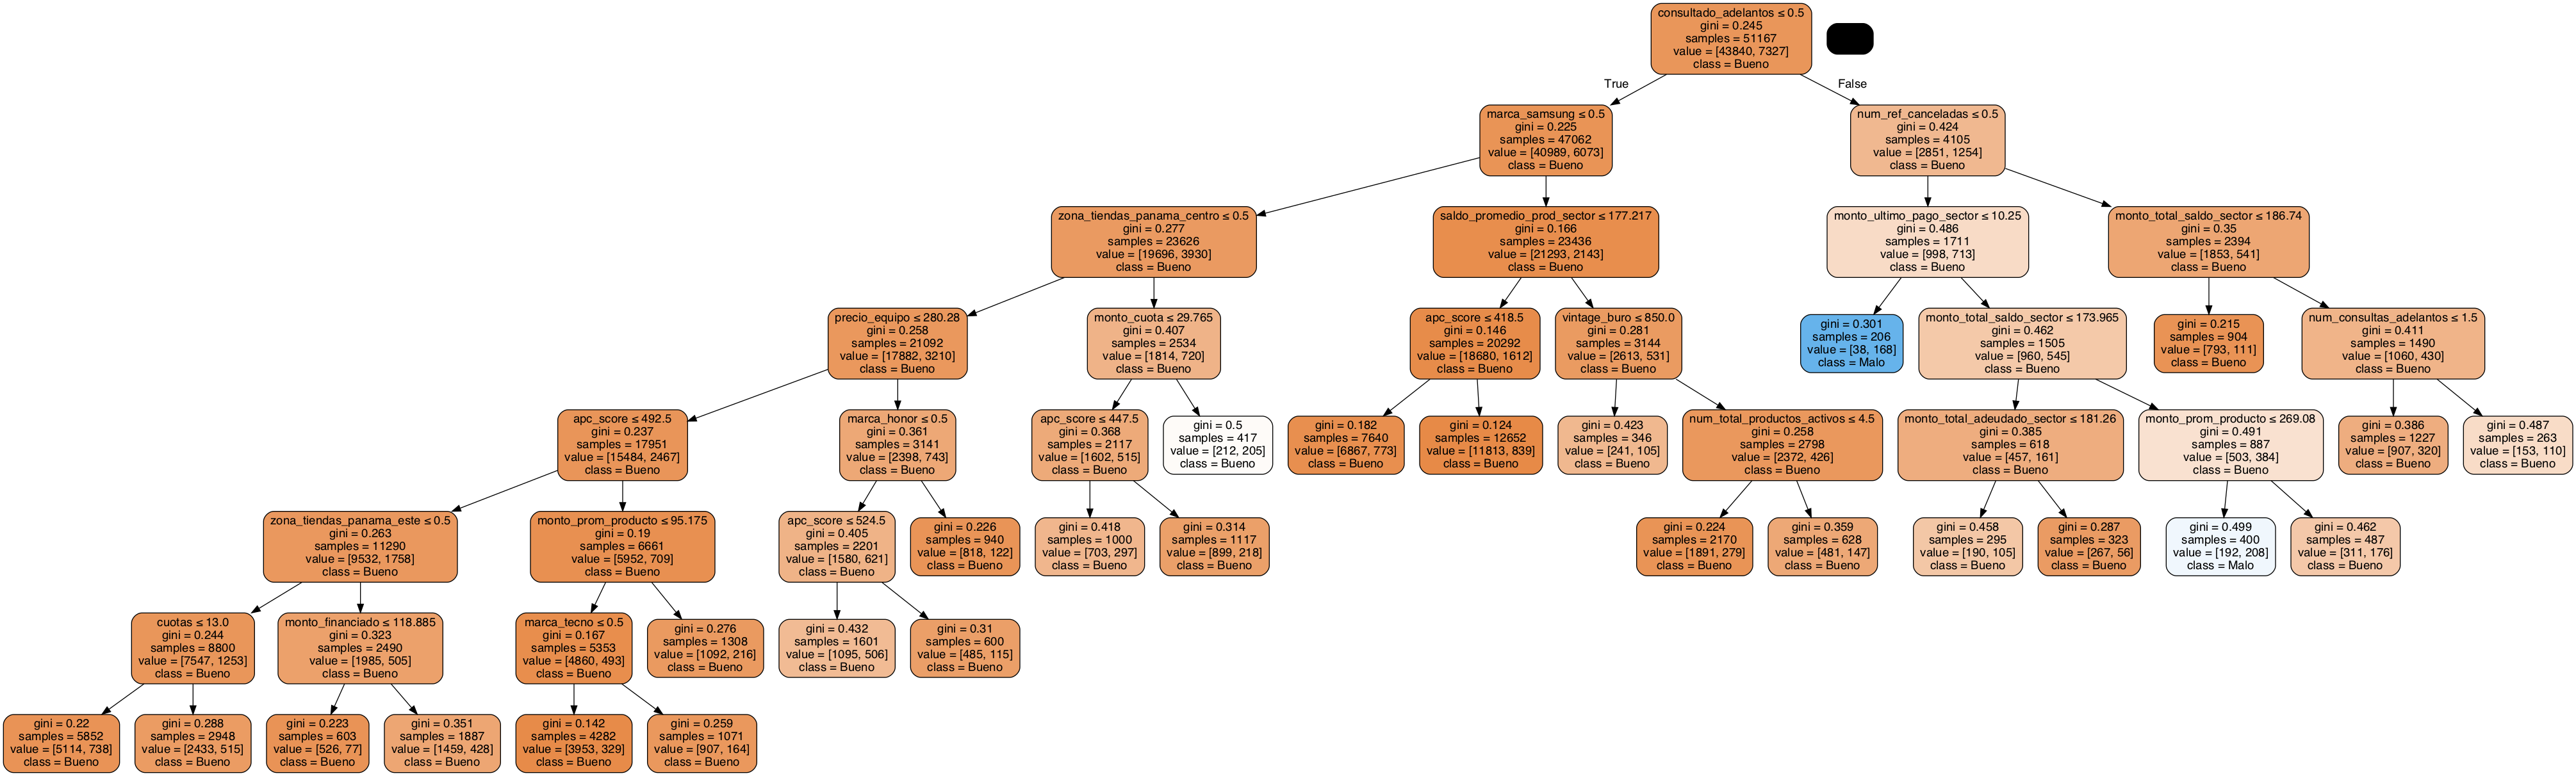

In [24]:
# Modelo presentado a Javier con dataset final_fraud_dataset_fix, se ajusta apc_score de cartera
dot_data = StringIO()
tree.export_graphviz(modelo, 
                     filled=True, rounded=True,  #nodos redondeados y coloreados
                     class_names=['Bueno','Malo'],
                     feature_names=X_train.columns,  
                     out_file=dot_data,
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

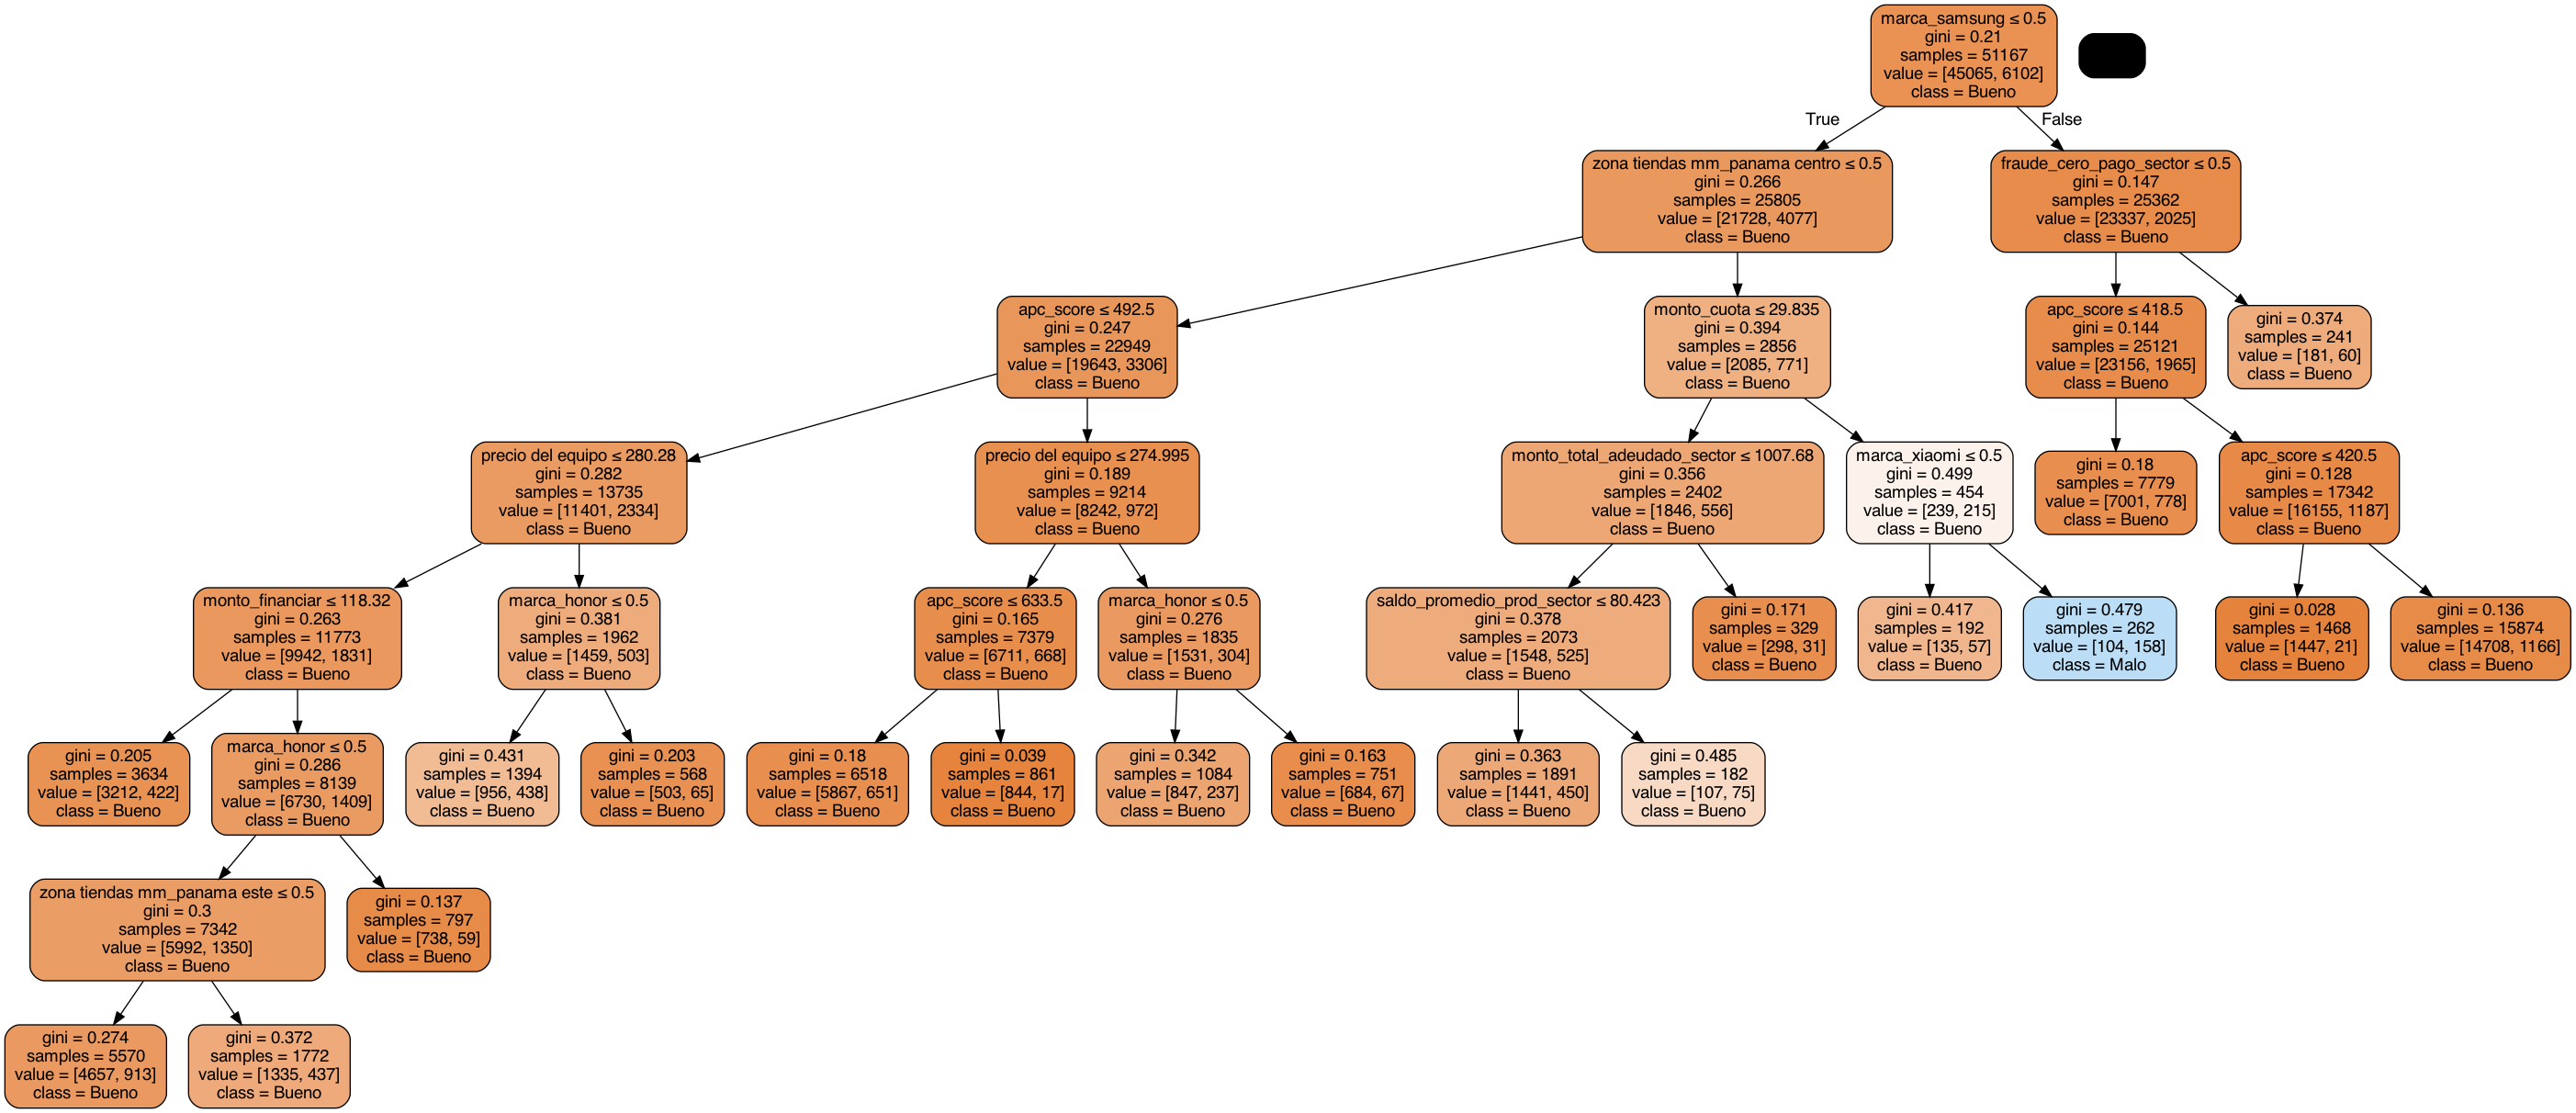

In [797]:
# Modelo ajustado por Javi por sub variables
dot_data = StringIO()
tree.export_graphviz(modelo, 
                     filled=True, rounded=True,  #nodos redondeados y coloreados
                     class_names=['Bueno','Malo'],
                     feature_names=X_train.columns,  
                     out_file=dot_data,
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

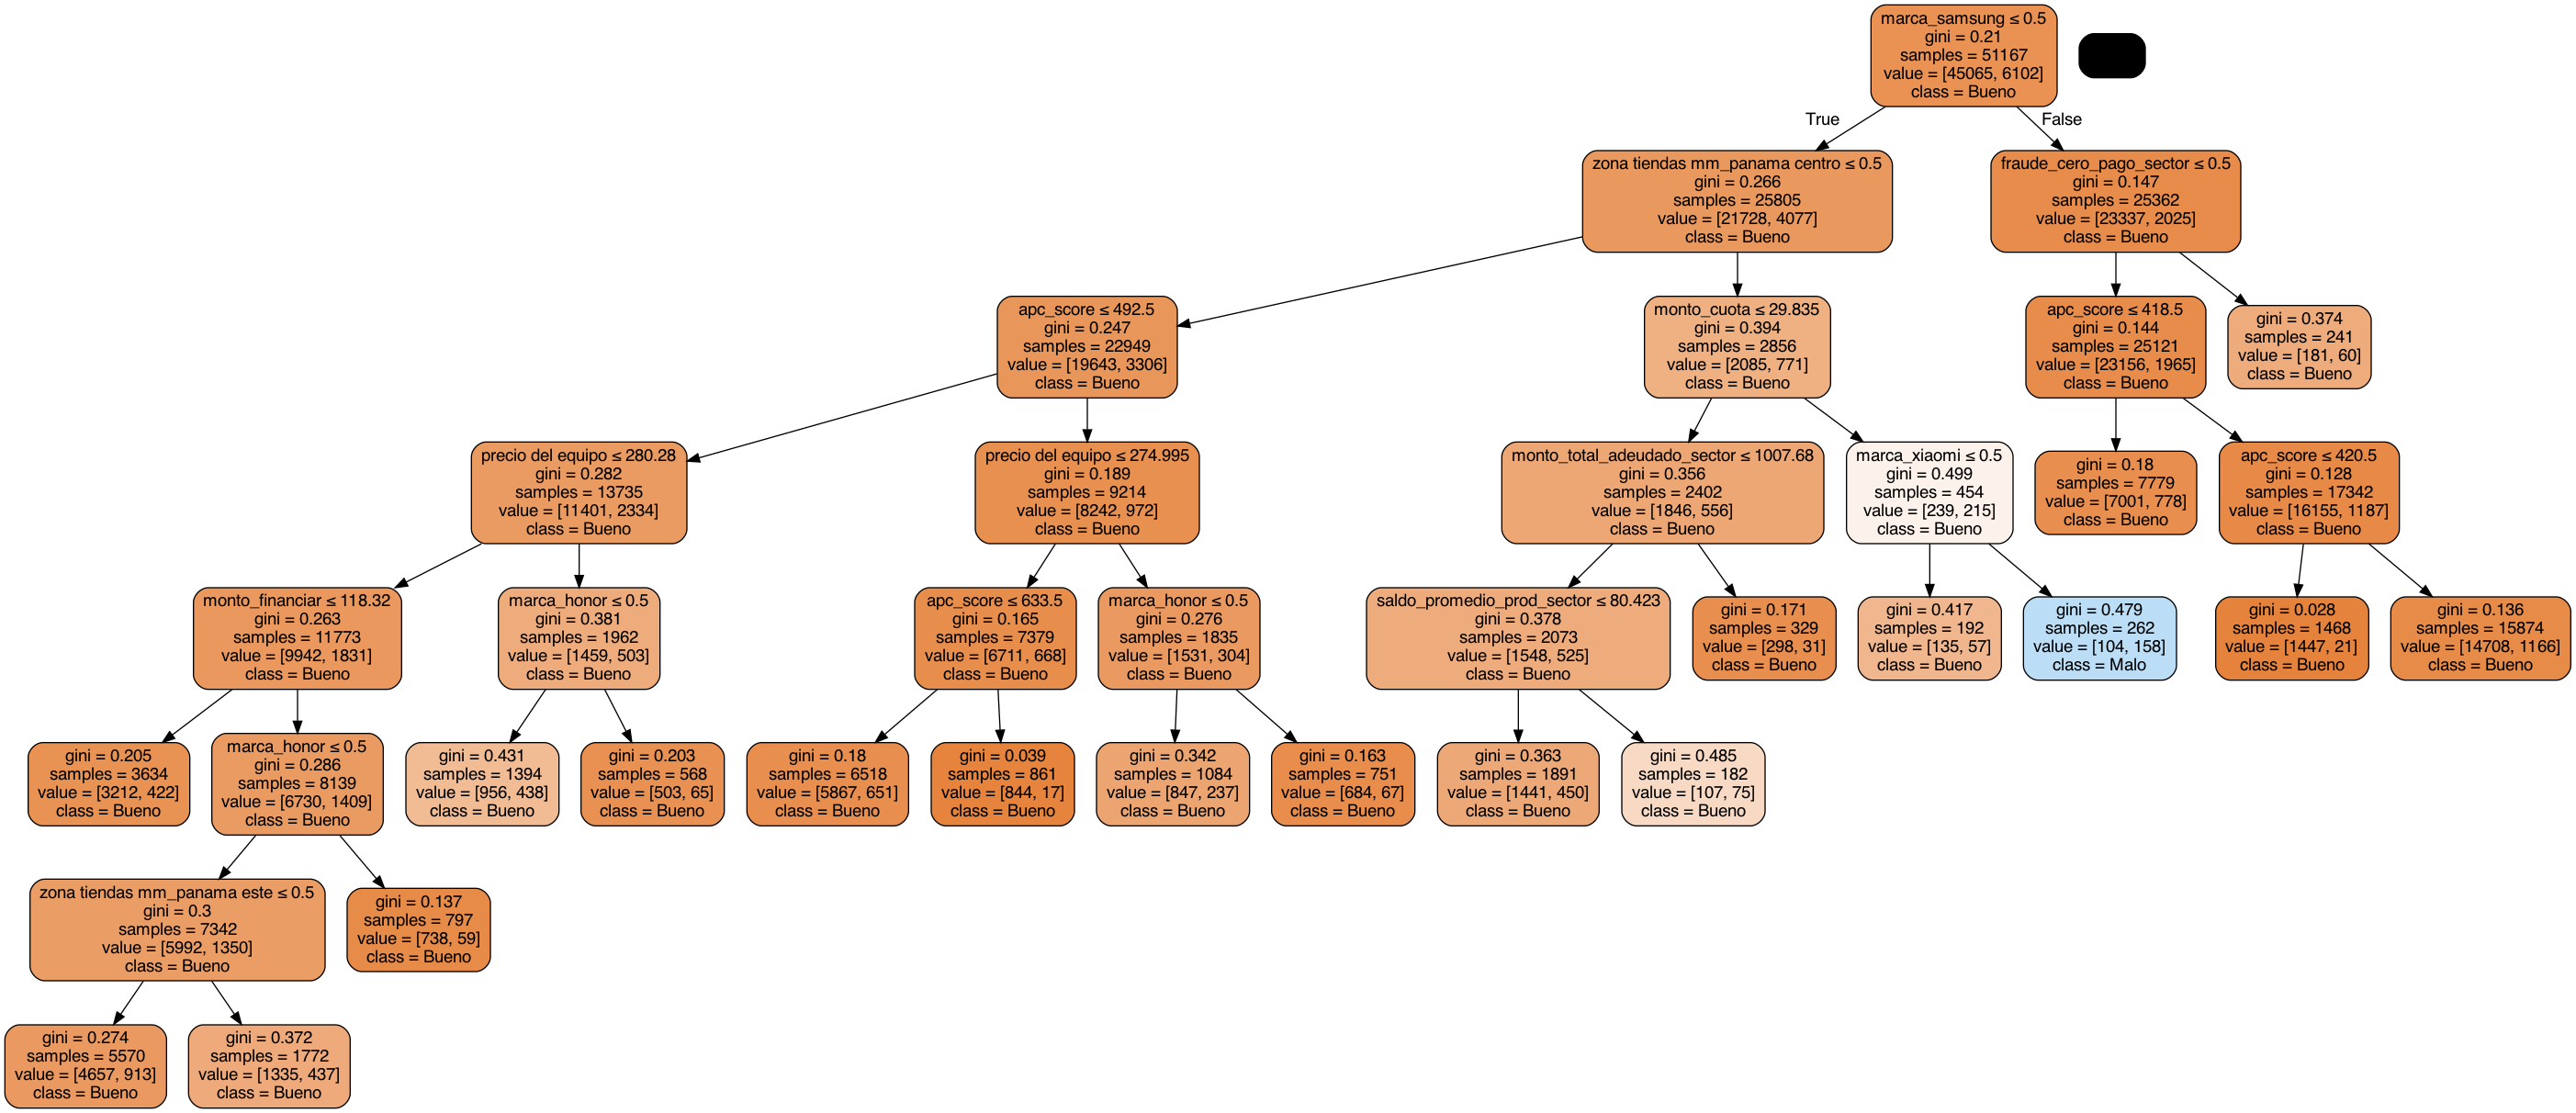

In [856]:
#Modelo ajustado por Javi con sub variables y sin variable "fallecido"
dot_data = StringIO()
tree.export_graphviz(modelo,
                     filled=True, rounded=True,  #nodos redondeados y coloreados
                     class_names=['Bueno','Malo'],
                     feature_names=X_train.columns,  
                     out_file=dot_data,
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

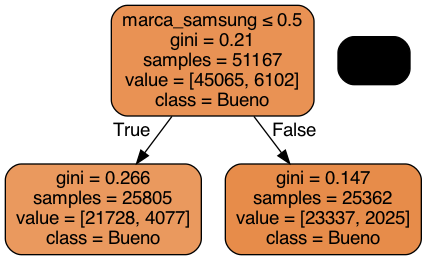

In [56]:
#Modelo ajustado por Javi con sub variables y sin variable "fallecido" y sin variables de KS2Sam
dot_data = StringIO()
tree.export_graphviz(modelo,
                     filled=True, rounded=True,  #nodos redondeados y coloreados
                     class_names=['Bueno','Malo'],
                     feature_names=X_train.columns,  
                     out_file=dot_data,
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### 4.1. Shapley Values: 

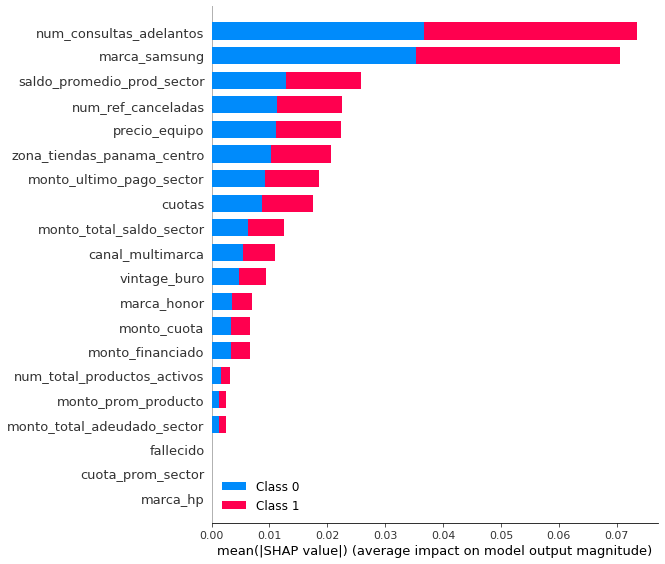

In [534]:
#Modelo presentado a Javi 
explainer = shap.TreeExplainer(modelo)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

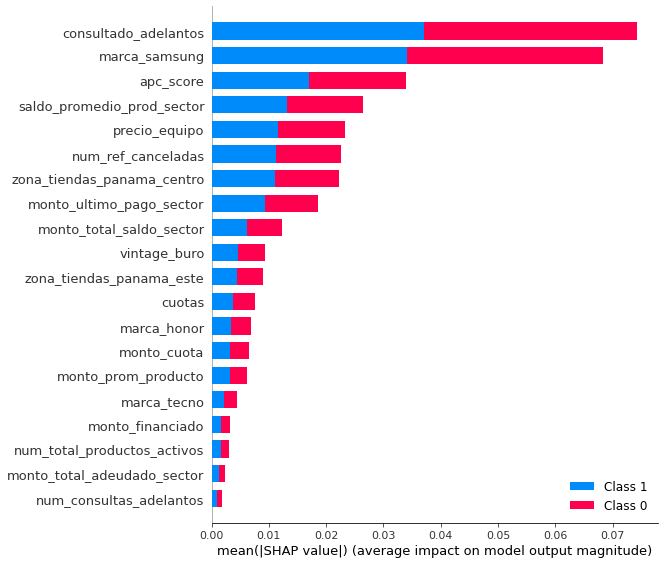

In [25]:
#Modelo presentado a Javi con dataset final_fraud_dataset_fix, se ajusta apc_score de cartera
explainer = shap.TreeExplainer(modelo)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

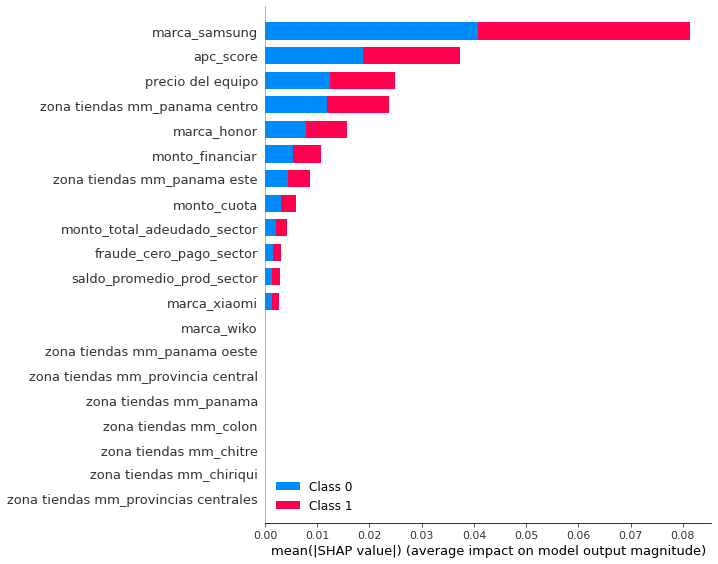

In [799]:
# New strategy Javi sub variables
explainer = shap.TreeExplainer(modelo)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

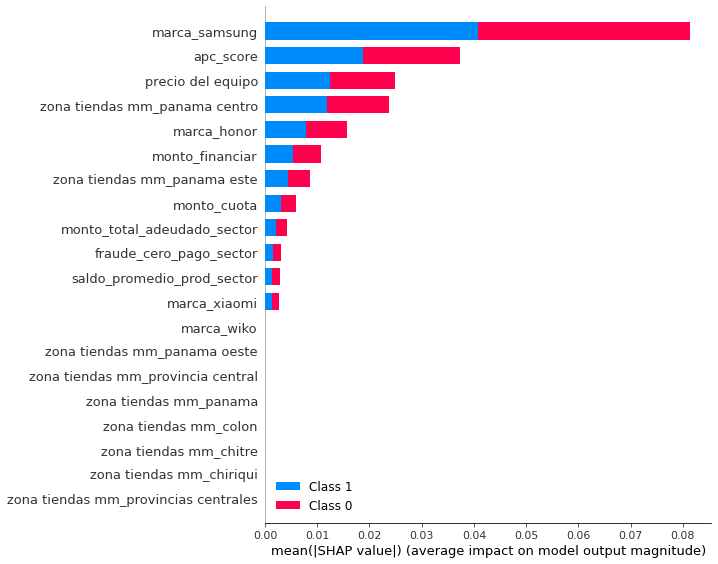

In [857]:
# New strategy Javi sub variables sin variable "fallecido" por CSI
explainer = shap.TreeExplainer(modelo)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

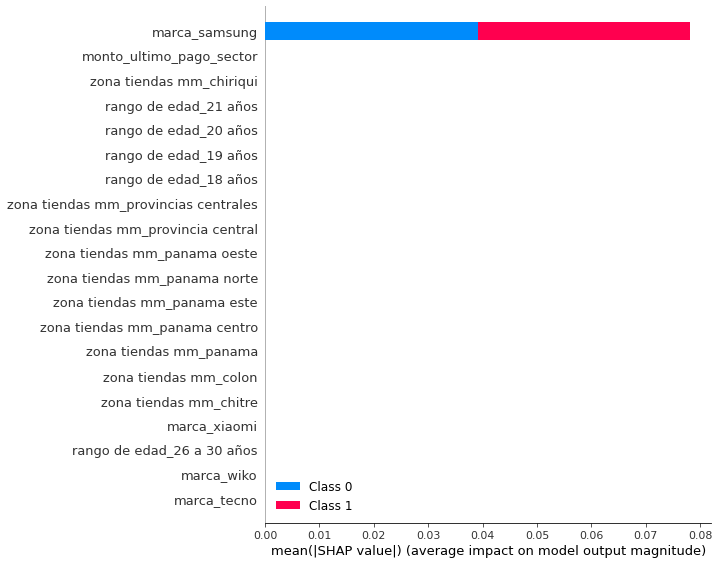

In [57]:
# New strategy Javi sub variables sin variable "fallecido" por CSI ni las variables eliminadas por KS2Sam
explainer = shap.TreeExplainer(modelo)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

In [535]:
X_train.columns

Index(['num_creditos', 'precio_equipo', 'monto_financiado', 'monto_abono',
       'cuotas', 'monto_cuota', 'tiene_info_buro', 'vintage_buro', 'score_apc',
       'prob_incumplimiento', 'num_ref_canceladas', 'fallecido',
       'num_dias_consultados', 'num_comercios_consultados',
       'consultado_adelantos', 'num_consultas_adelantos', 'consultado_krediya',
       'num_consultas_krediya', 'num_productos_dif_activos',
       'num_total_productos_activos', 'monto_total_adeudado_sector',
       'monto_prom_producto', 'monto_total_saldo_sector',
       'saldo_promedio_prod_sector', 'max_dias_atraso_sector',
       'cuota_prom_sector', 'monto_ultimo_pago_sector', 'mix_productos',
       'productos_crediticios', 'otros_productos', 'porc_abono', 'marca_asus',
       'marca_hp', 'marca_honor', 'marca_huawei', 'marca_infinix', 'marca_lg',
       'marca_motorola', 'marca_nokia', 'marca_realme', 'marca_samsung',
       'marca_tecno', 'marca_wiko', 'marca_xiaomi', 'zona_tiendas_chiriqui',
       '

In [399]:
feat_import = modelo.feature_importances_

In [400]:
feat_import

array([0.        , 0.02160815, 0.00370983, 0.00348144, 0.01456317,
       0.02299072, 0.        , 0.80766705, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00383385, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02240836,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0536298 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02975813,
       0.01158452, 0.00285775, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00190723])

In [305]:
X_train.columns

Index(['APC_Score', '% Abono', 'Monto de Abono', 'Monto de la Cuota',
       'Numero de Cuotas', 'Monto_Financiar', 'Precio del Equipo',
       'Marca_Asus', 'Marca_HP', 'Marca_Honor',
       ...
       'servicio_publico', 'leasing', 'prestamo_educativo', 'max_dias_atraso',
       'min_dias_atraso', 'min_cuota', 'avg_cuota', 'max_cuota',
       'total_ult_pago', 'avg_ult_pago'],
      dtype='object', length=136)

In [644]:
y_predicho = modelo.predict(X_test)

In [645]:
pd.DataFrame(y_predicho).value_counts()

0    21697
1      232
dtype: int64

In [743]:
pd.DataFrame(y_predicho).value_counts(normalize=True)

0    0.98942
1    0.01058
dtype: float64

In [741]:
from sklearn.metrics import confusion_matrix

In [742]:
confusion_matrix(y_test, y_predicho)

array([[18694,    95],
       [ 3003,   137]])

In [141]:
# save model Proof of concept
with open('../../../Models/fraude/model_PoC.pkl','wb') as f:
    pickle.dump(modelo,f)

In [581]:
# save model fraude and buro
with open('../../../Models/fraude/model_buro_final.pkl','wb') as f:
    pickle.dump(modelo,f)

In [19]:
# save model presentado a Javier
with open('../../../Models/fraude/model_buro_presentado_Javi.pkl','wb') as f:
    pickle.dump(modelo,f)

In [27]:
# save model presentado a Javier con fix apc_score
with open('../../../Models/fraude/model_buro_presentado_Javi_apc_score_fix.pkl','wb') as f:
    pickle.dump(modelo,f)

In [58]:
# Save model fraude with 2 variables stategy of Javi
with open('../../../Models/fraude/model_buro_javi_complete.pkl','wb') as f:
    pickle.dump(modelo,f)

## 4. Setting Wandb training process

In [10]:
PATH_RESOURCES = '../../../Reports/fraude/'
PSI_CLASS = calculate_stability_index()

In [ ]:
#Las mejores encontradas:
{'max_depth': 6.8840045959721134,
 'max_leaf_nodes': 44.596510978407906,
 'min_impurity_decrease': 0.0001701525878783361,
 'min_samples_leaf': 182.47277394896665,
 'min_samples_split': 150.2221680450833}

In [ ]:
    '''
    'parameters' : {
        'max_depth':{'min': 3, 'max': 7},
        'min_samples_split':{'min': 5, 'max': 300},
        'min_samples_leaf': {'min': 5, 'max':200},
        'max_leaf_nodes':{'min': 20, 'max':100},
        'min_impurity_decrease':{'min':0.0, 'max':1.0} # Antes el maximo estaba hasta 10.
    },
    '''

In [17]:
sweep_config = {
    'name':'Kredyya-Sweep-fraud-Tree-Decision',
    'method': 'bayes',
    'metric': {
      'name': 'test_auc',
      'goal': 'maximize'
    },

    'parameters' : {
        'max_depth':{'min': 6, 'max': 7},
        'min_samples_split':{'min': 145, 'max': 160},
        'min_samples_leaf': {'min': 180, 'max': 190},
        'max_leaf_nodes':{'min': 40, 'max':50},
        'min_impurity_decrease':{'min':0.0, 'max':0.0002} # Antes el maximo estaba hasta 10.
    }
}

In [18]:
import os
os.environ['WANDB_NOTEBOOK_NAME'] = 'modeling_bayes_opt_fraude.ipynb'
sweep_id = wandb.sweep(sweep_config, project='Kredyya', entity='diegob')

Create sweep with ID: utomlr5a
Sweep URL: https://wandb.ai/diegob/Kredyya/sweeps/utomlr5a


In [15]:
os.environ["WANDB_SILENT"] = "true"

In [ ]:
def train():
    

    with wandb.init(tags=['fraud']) as run:

        global config
        global bst
    
        # Config is a variable that holds and saves hyperparameters and inputs
        config = wandb.config

        modelo = DecisionTreeClassifier(
            max_depth = config.max_depth,
            min_samples_split = config.min_samples_split,
            min_samples_leaf = config.min_samples_leaf,
            max_leaf_nodes = config.max_leaf_nodes,
            min_impurity_decrease = config.min_impurity_decrease,
        )
        
        modelo.fit(X_train, y_train)
  
        predict_proba_train = modelo.predict_proba(X_train)[:, 1]    
        predict_proba_test  = modelo.predict_proba(X_test)[:, 1]

        auc_train = roc_auc_score(y_train, predict_proba_train).round(2)
        auc_test = roc_auc_score(y_test,predict_proba_test ).round(2)

        preds_train = pd.Series(
            predict_proba_train
        ).to_frame(name='prob').assign(target=y_train.values)

        preds_test = pd.Series(
            predict_proba_test
        ).to_frame(name='prob').assign(target=y_test.values)

        metrics_train_ks = decile_metrics(data=preds_train)
        metrics_test_ks  = decile_metrics_test_from_train(metrics_train_ks, preds_test)

        print(f"Metrics Train Ks: {max(metrics_train_ks['KS'])}")
        print(f"Metrics Test KS: {max(metrics_test_ks['KS'])}")

        wandb.log({
            'auc_train':auc_train,
            'auc_test':auc_test,
            'objective':auc_test,
            'model': modelo.get_params(),
            'ks_train':max(metrics_train_ks['KS']),
            'ks_test':max(metrics_test_ks['KS'])})
            
        try:

            if int(max(metrics_test_ks['KS'])) >= 16:

                fig_ks_train = graph_ks_2(metrics_train_ks,'Training')
                fig_ks_test  = graph_ks_2(metrics_test_ks ,'Test')
                fig_graph_bad_rate = graph_bad_rate_2(metrics_train_ks, metrics_test_ks)

                wandb.log({               
                'Plot_train_ks': wandb.Image(fig_ks_train),
                'Plot_test_ks': wandb.Image(fig_ks_test),
                'Plot_graph_bad_rate': wandb.Image(fig_graph_bad_rate)
                },commit=True)
                
                psi_calculado  = PSI_CLASS.calculus_of_psi(
                    preds_train.reset_index(), 
                    preds_test.reset_index(),
                    'index',
                    'index',  
                    'prob',
                    'prob',
                    metrics_train_ks.shape[0]
                     )

                #Plotting decision tree
                dot_data = StringIO()
                tree.export_graphviz(modelo, 
                     filled=True, rounded=True,  #nodos redondeados y coloreados
                     class_names=['Bueno','Malo'],
                     feature_names=X_train.columns,  
                     out_file=dot_data,
                     special_characters=True)
                graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
                path_img = f"{PATH_RESOURCES}/decisionTree.png"
                graph.write_png(path_img)
                fig_graph_tree = plt.imread(path_img)

                #Clear plt object to plot new figures
                plt.clf()

                #Plotting shap values:
                explainer = shap.TreeExplainer(modelo)
                shap_values = explainer.shap_values(X_train)
                shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, show=False)
                path_img = f"{PATH_RESOURCES}/shap_values.png"
                plt.savefig(path_img, format='png', dpi=600, bbox_inches='tight')
                fig_graph_shap_values = plt.imread(path_img)
                 
                wandb.log({
                    'PSI': psi_calculado,
                    'Plot_graph_tree': wandb.Image(fig_graph_tree),
                    'Plot_graph_shap_values': wandb.Image(fig_graph_shap_values)
                },commit=True)

                plt.close('all')
                
                model_name = run.name
                joblib.dump(modelo, f"../../../Models/fraude/{model_name}.lib")
                run.finish()
        except Exception as e:
            print("Se revento: ", e )

    return auc_test
            
count = 50 # number of runs
wandb.agent(sweep_id, function=train, count=count)

## 5. Evaluation model (Debe pasarse a otro Notebook)

In [ ]:
### Modelo ajustado por Javi, donde se agregan las 2 sub variables

train_auc:0.664557233200756, test_auc:0.6635486082772956, baseline_auc:0.5


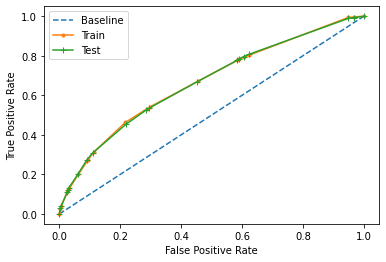

In [805]:
# baseline:
baseline_probs = [0 for _ in range(len(y_test))]

# calculate roc curves
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, predict_proba_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, predict_proba_test)
baseline_fpr, baseline_tpr, baseline_thresholds = roc_curve(y_test, baseline_probs)

train_auc = roc_auc_score(y_train, predict_proba_train)
test_auc = roc_auc_score(y_test, predict_proba_test)
baseline_auc = roc_auc_score(y_test, baseline_probs)

print(f"train_auc:{train_auc}, test_auc:{test_auc}, baseline_auc:{baseline_auc}")

# plot the roc curve for the model
plt.plot(baseline_fpr, baseline_tpr, linestyle='--', label='Baseline')
plt.plot(train_fpr, train_tpr, marker='.', label='Train')
plt.plot(test_fpr, test_tpr, marker='+', label='Test')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

the auc score is 0.664557233200756


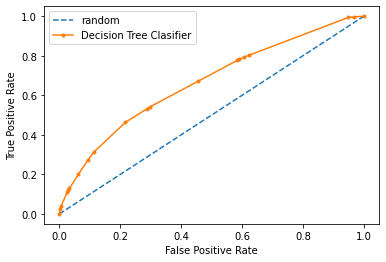

In [816]:
plot_AUC(modelo, X_train, y_train)

the auc score is 0.6635486082772956


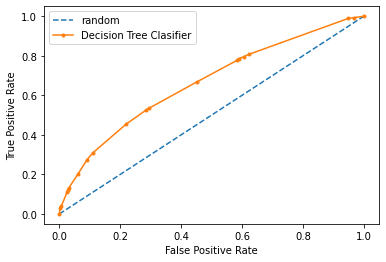

In [817]:
plot_AUC(modelo, X_test, y_test)

In [28]:
preds_train = pd.Series(
    predict_proba_train
).to_frame(name='prob').assign(target=y_train.values)

preds_test = pd.Series(
    predict_proba_test
).to_frame(name='prob').assign(target=y_test.values)

In [29]:
metrics_train = decile_metrics(data=preds_train)
metrics_train

Se revento el decil_metrics Bin edges must be unique: array([0.06631363, 0.06631363, 0.06631363, 0.07683326, 0.10117801,
       0.12611073, 0.12611073, 0.15312792, 0.19166667, 0.2607987 ,
       0.81553398]).
You can drop duplicate edges by setting the 'duplicates' kwarg
Se revento el decil_metrics Bin edges must be unique: array([0.06631363, 0.06631363, 0.06631363, 0.10117801, 0.10117801,
       0.12611073, 0.12978723, 0.17469471, 0.2607987 , 0.81553398]).
You can drop duplicate edges by setting the 'duplicates' kwarg
Se revento el decil_metrics Bin edges must be unique: array([0.06631363, 0.06631363, 0.07683326, 0.10117801, 0.12611073,
       0.12857143, 0.17469471, 0.23407643, 0.81553398]).
You can drop duplicate edges by setting the 'duplicates' kwarg
Se revento el decil_metrics Bin edges must be unique: array([0.06631363, 0.06631363, 0.07683326, 0.10117801, 0.12611073,
       0.16513761, 0.22681505, 0.81553398]).
You can drop duplicate edges by setting the 'duplicates' kwarg
Se re

min_prob  max_prob  events  nonevents  ... cum_noneventrate    KS  \
Decile                                         ...                          
1       0.191667  0.815534    3108       7366  ...         0.168020  25.6   
2       0.127695  0.174695    1429       7934  ...         0.348996  27.0   
3       0.101178  0.126111    1622      12774  ...         0.640374  20.0   
4       0.066314  0.076833    1168      15766  ...         1.000000   0.0   

        bad_rate  cum_bad_rate  
Decile                          
1       0.296735      0.143198  
2       0.152622      0.103679  
3       0.112670      0.089052  
4       0.068974      0.068974  

[4 rows x 11 columns]

In [30]:
metrics_test  = decile_metrics_test_from_train(metrics_train, preds_test)
metrics_test

min_prob  max_prob  events  nonevents  event_rate  ...  cum_eventrate  \
Decile                                                     ...                  
1       0.191667  0.815534    1196       3165    0.507425  ...       0.507425   
2       0.127695  0.174695     394       2389    0.167162  ...       0.674586   
3       0.101178  0.126111     378       3377    0.160373  ...       0.834960   
4       0.066314  0.076833     389       4929    0.165040  ...       1.000000   

        cum_noneventrate    KS  bad_rate  cum_bad_rate  
Decile                                                  
1               0.228355  27.9  0.274249      0.145341  
2               0.400722  27.4  0.141574      0.097925  
3               0.644372  19.1  0.100666      0.084537  
4               1.000000   0.0  0.073148      0.073148  

[4 rows x 11 columns]

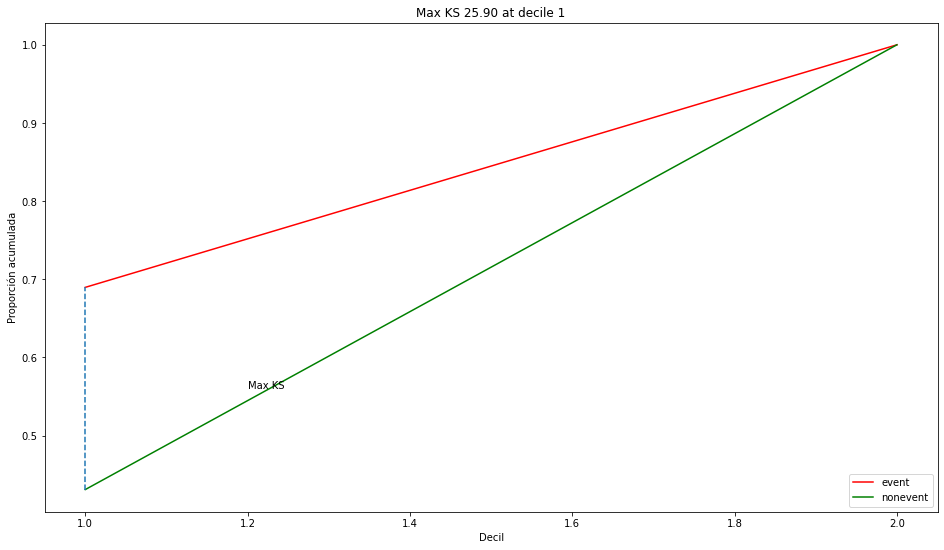

In [139]:
# Modelo presentado a Javi: Solo tiene 2 deciles por poca complejidad del àrbol
graph_ks(metrics_train);

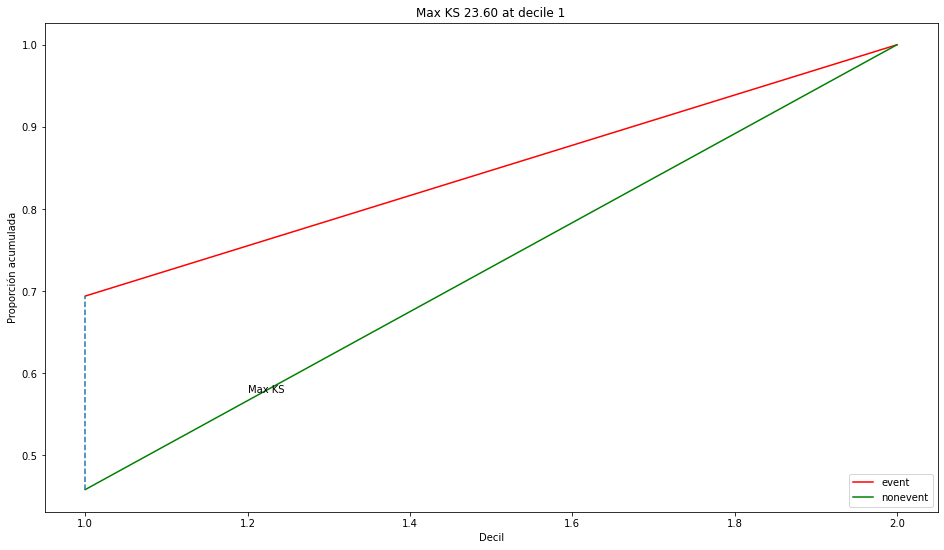

In [140]:
# Modelo presentado a Javi: Sòlo tiene 2 deciles por poca complejidad del àrbol.
graph_ks(metrics_test);

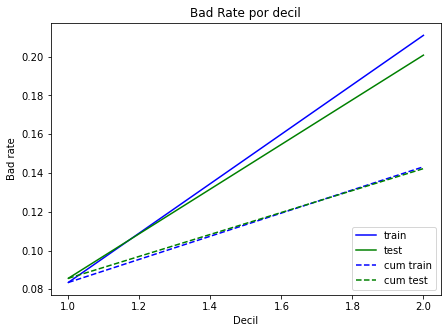

In [141]:
# Modelo presentado a Javi
#En vez de bad rate es Fraude 
graph_bad_rate(metrics_train, metrics_test);

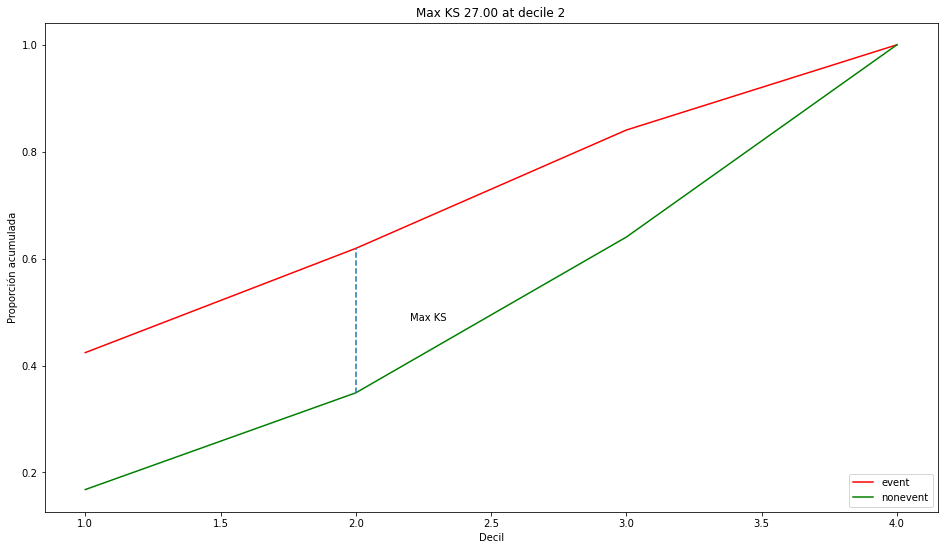

In [31]:
# Modelo presentado a Javi: Ajuste de apc_score de cartera
graph_ks(metrics_train);

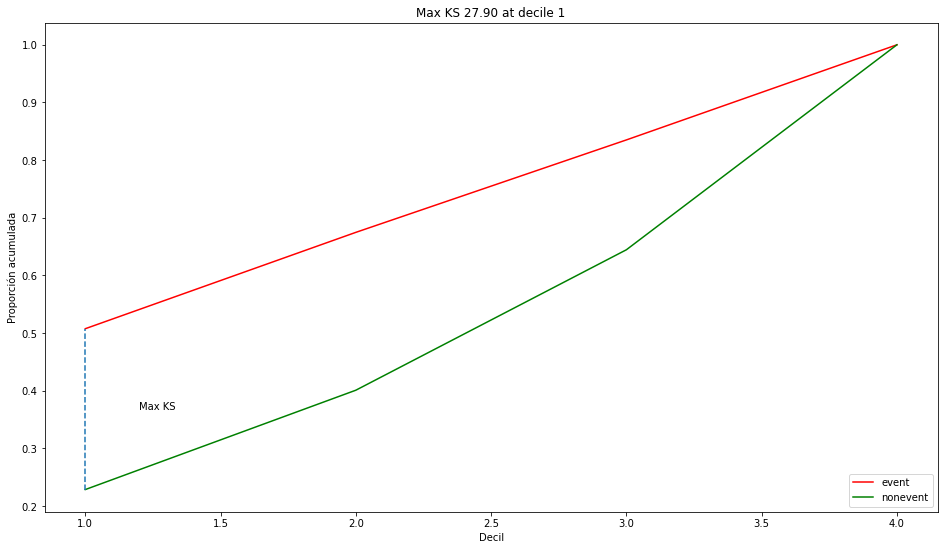

In [32]:
# Modelo presentado a Javi: Ajuste de apc_score de cartera
graph_ks(metrics_test);

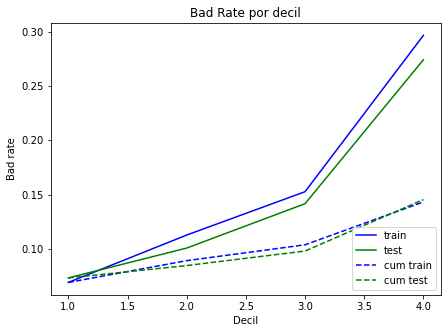

In [33]:
# Modelo presentado a Javi con ajuste de apc_score
#En vez de bad rate es Fraude 
graph_bad_rate(metrics_train, metrics_test);

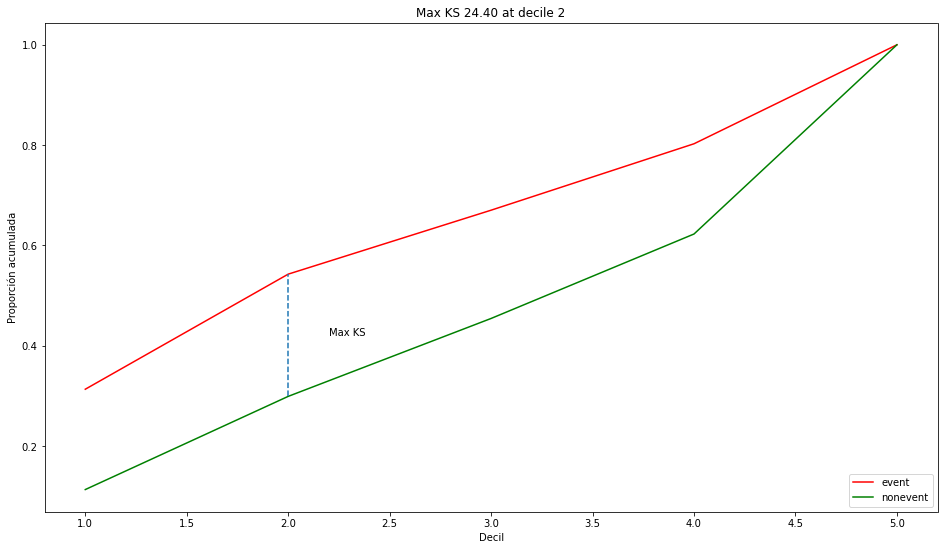

In [809]:
# Modelo ajustado por Javi con 2 sub variables. Este modelo alcanza a tener 5 deciles
graph_ks(metrics_train);

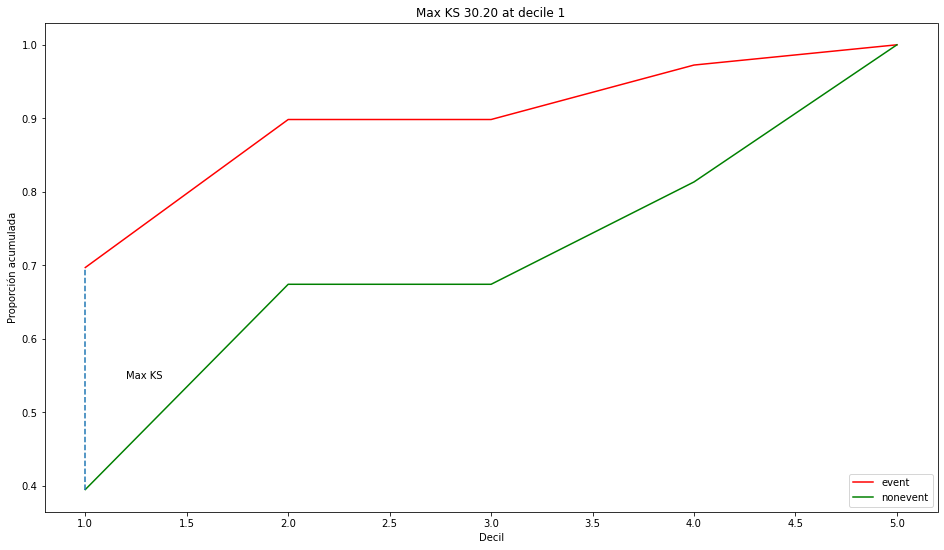

In [810]:
# Modelo ajustado por Javi con 2 sub variables. Este modelo alcanza a tener 5 deciles
graph_ks(metrics_test);

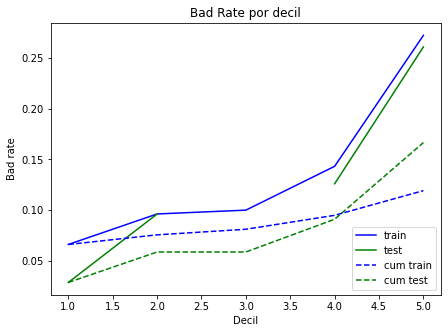

In [812]:
# Modelo ajustado por Javi con 2 sub variables
#En vez de bad rate es Fraude 
graph_bad_rate(metrics_train, metrics_test);

### 5.1. PSI and CSI Evaluation

In [138]:
#Modelo presentado a Javi
PSI_CLASS = calculate_stability_index()
                
psi_calculado  = PSI_CLASS.calculus_of_psi(
    preds_train.reset_index(), 
    preds_test.reset_index(),
    'index',
    'index',  
    'prob',
    'prob',
     2)

print(psi_calculado)

1.6277976287683285e-05


Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.


In [34]:
#Modelo presentado a Javi con ajuste de apc_score de cartera
PSI_CLASS = calculate_stability_index()
                
psi_calculado  = PSI_CLASS.calculus_of_psi(
    preds_train.reset_index(), 
    preds_test.reset_index(),
    'index',
    'index',  
    'prob',
    'prob',
     4)

print(psi_calculado)

0.11342848842602064


Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.


El valor real sin notaciòn cientìfica (1.6277976287683285e-05) es:
0.00001627

In [827]:
#Modelo de Javi estrategia con sub variables: Este es el que tiene 5 deciles pero tiene un PSI de 0.86, alto.
PSI_CLASS = calculate_stability_index()
                
psi_calculado  = PSI_CLASS.calculus_of_psi(
    preds_train.reset_index(), 
    preds_test.reset_index(),
    'index',
    'index',  
    'prob',
    'prob',
     5)

print(psi_calculado)

0.8637260402275856


In [921]:
#Modelo de Javi estrategia con sub variables y sin variable "fallido"
PSI_CLASS = calculate_stability_index()
                
psi_calculado  = PSI_CLASS.calculus_of_psi(
    preds_train.reset_index(), 
    preds_test.reset_index(),
    'index',
    'index',  
    'prob',
    'prob',
     5)

print(psi_calculado)

0.8637260402275856


Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.


In [62]:
#Modelo de Javi estrategia con sub variables y sin variable "fallido" y sin variables eliminadas por KS2Sam
PSI_CLASS = calculate_stability_index()
                
psi_calculado  = PSI_CLASS.calculus_of_psi(
    preds_train.reset_index(), 
    preds_test.reset_index(),
    'index',
    'index',  
    'prob',
    'prob',
     1)

print(psi_calculado)

0.0


Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.


In [ ]:
#Modelo de Javi con sub variables
csi_train_vs_test = PSI_CLASS.csi(
    X_train.reset_index(), X_test.reset_index(),'index','index', 'prob')

In [832]:
#Modelo de Javi con sub variables
csi_train_vs_test.sort_values(by='csi', ascending=False)

colname         csi status
15                    fallecido  100.000000  index
30     monto_ultimo_pago_sector    1.862199     ok
29            cuota_prom_sector    1.832210     ok
16         num_dias_consultados    1.455926     ok
13          prob_incumplimiento    1.416257     ok
17    num_comercios_consultados    1.297584     ok
28       max_dias_atraso_sector    1.185765     ok
27   saldo_promedio_prod_sector    1.164646     ok
26     monto_total_saldo_sector    1.164325     ok
23  num_total_productos_activos    1.068328     ok
12                 vintage_buro    1.062480     ok
25          monto_prom_producto    0.967746     ok
24  monto_total_adeudado_sector    0.966782     ok
14           num_ref_canceladas    0.935991     ok
22    num_productos_dif_activos    0.809341     ok
21        num_consultas_krediya    0.594325     ok
0                     apc_score    0.511007     ok
7               gama del equipo    0.001955     ok
2                   monto_abono    0.001220     ok
5               monto_financiar    0.001108     ok
6             precio del equipo    0.001022     ok
3                   monto_cuota    0.001016     ok
1                       %_abono    0.000211     ok
4                 numero_cuotas    0.000098     ok
18         consultado_adelantos    0.000000     ok
19      num_consultas_adelantos    0.000000     ok
20           consultado_krediya    0.000000     ok
11        fraude_en_mora_sector    0.000000     ok
10      fraude_cero_pago_sector    0.000000     ok
9               tiene_info_buro    0.000000     ok
8              canal_multimarca    0.000000     ok

In [859]:
# Modelo de Javi sub variables y sin variable "fallecido"
csi_train_vs_test = PSI_CLASS.csi(
    X_train.reset_index(), X_test.reset_index(),'index','index', 'prob')
csi_train_vs_test.sort_values(by='csi', ascending=False)

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.


colname       csi status
29     monto_ultimo_pago_sector  1.862199     ok
28            cuota_prom_sector  1.832210     ok
15         num_dias_consultados  1.455926     ok
13          prob_incumplimiento  1.416257     ok
16    num_comercios_consultados  1.297584     ok
27       max_dias_atraso_sector  1.185765     ok
26   saldo_promedio_prod_sector  1.164646     ok
25     monto_total_saldo_sector  1.164325     ok
22  num_total_productos_activos  1.068328     ok
12                 vintage_buro  1.062480     ok
24          monto_prom_producto  0.967746     ok
23  monto_total_adeudado_sector  0.966782     ok
14           num_ref_canceladas  0.935991     ok
21    num_productos_dif_activos  0.809341     ok
20        num_consultas_krediya  0.594325     ok
0                     apc_score  0.511007     ok
7               gama del equipo  0.001955     ok
2                   monto_abono  0.001220     ok
5               monto_financiar  0.001108     ok
6             precio del equipo  0.001022     ok
3                   monto_cuota  0.001016     ok
1                       %_abono  0.000211     ok
4                 numero_cuotas  0.000098     ok
17         consultado_adelantos  0.000000     ok
18      num_consultas_adelantos  0.000000     ok
19           consultado_krediya  0.000000     ok
11        fraude_en_mora_sector  0.000000     ok
10      fraude_cero_pago_sector  0.000000     ok
9               tiene_info_buro  0.000000     ok
8              canal_multimarca  0.000000     ok

### 5.2. Todas las variables dummificadas se distribuyen de manera similar en train y test

In [998]:
df_dum_marcas = list(X_train.filter(regex='marca_').columns)
df_dum_zonas =  list(X_train.filter(regex='zona').columns)
df_dum_rango =  list(X_train.filter(regex='rango').columns)

In [999]:
df_dum_zonas.extend(df_dum_marcas)
df_dum_zonas.extend(df_dum_rango)

In [1000]:
df_dum_zonas.extend(
    [
    'consultado_krediya',
    'consultado_adelantos',
    'fraude_en_mora_sector',
    'tiene_info_buro',
    'canal_multimarca',
    'gama del equipo',
    ]
)

In [1035]:
len(df_dum_zonas)

45

In [1009]:
df_dum_zonas

['zona tiendas mm_chiriqui',
 'zona tiendas mm_chitre',
 'zona tiendas mm_colon',
 'zona tiendas mm_panama',
 'zona tiendas mm_panama centro',
 'zona tiendas mm_panama este',
 'zona tiendas mm_panama norte',
 'zona tiendas mm_panama oeste',
 'zona tiendas mm_provincia central',
 'zona tiendas mm_provincias centrales',
 'marca_asus',
 'marca_hp',
 'marca_honor',
 'marca_huawei',
 'marca_infinix',
 'marca_lg',
 'marca_motorola',
 'marca_nokia',
 'marca_realme',
 'marca_samsung',
 'marca_tecno',
 'marca_wiko',
 'marca_xiaomi',
 'rango de edad_18 años',
 'rango de edad_19 años',
 'rango de edad_20 años',
 'rango de edad_21 años',
 'rango de edad_22 a 25 años',
 'rango de edad_26 a 30 años',
 'rango de edad_31 a 35 años',
 'rango de edad_36 a 40 años',
 'rango de edad_41 a 45 años',
 'rango de edad_46 a 50 años',
 'rango de edad_51 a 55 años',
 'rango de edad_56 a 60 años',
 'rango de edad_61 a 65 años',
 'rango de edad_66 a 70 años',
 'rango de edad_71 a 75 años',
 'rango de edad_mayor 75 

In [1138]:
index=44 #Esto va iterando desde el ìndice 0 hasta el 44.

<AxesSubplot:>

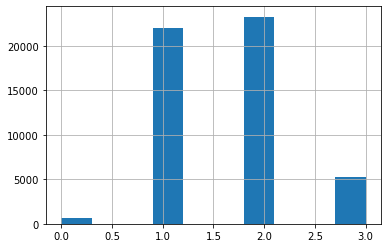

In [1139]:
X_train[df_dum_zonas[index]].hist()

<AxesSubplot:>

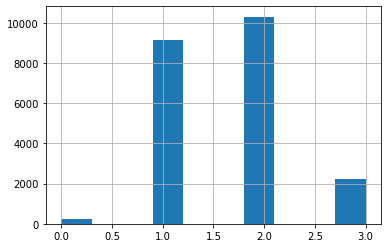

In [1140]:
X_test[df_dum_zonas[index]].hist()

In [1012]:
X_train[df_dum_zonas[1]].describe()

count    51167.000000
mean         0.000020
std          0.004421
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: zona tiendas mm_chitre, dtype: float64

In [1011]:
X_test[df_dum_zonas[1]].describe()

count    21929.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: zona tiendas mm_chitre, dtype: float64

In [1151]:
X_train_only_continuos = X_train[X_train.columns.difference(df_dum_zonas)].copy()
X_test_only_continuos  = X_test[X_test.columns.difference(df_dum_zonas)].copy()

In [1152]:
#Modelo de Javi con sub variables pero omitiendo las variables dumificadas
csi_train_vs_test_2 = PSI_CLASS.csi(
    X_train_only_continuos.reset_index(), X_test_only_continuos.reset_index(),'index','index', 'prob')

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.


In [1154]:
csi_train_vs_test_2.sort_values(by='csi', ascending=False)

colname       csi status
11     monto_ultimo_pago_sector  1.862199     ok
2             cuota_prom_sector  1.832210     ok
15         num_dias_consultados  1.455926     ok
21          prob_incumplimiento  1.416257     ok
12    num_comercios_consultados  1.297584     ok
4        max_dias_atraso_sector  1.185765     ok
22   saldo_promedio_prod_sector  1.164646     ok
10     monto_total_saldo_sector  1.164325     ok
18  num_total_productos_activos  1.068328     ok
23                 vintage_buro  1.062480     ok
8           monto_prom_producto  0.967746     ok
9   monto_total_adeudado_sector  0.966782     ok
17           num_ref_canceladas  0.935991     ok
16    num_productos_dif_activos  0.809341     ok
14        num_consultas_krediya  0.594325     ok
1                     apc_score  0.511007     ok
5                   monto_abono  0.001220     ok
7               monto_financiar  0.001108     ok
20            precio del equipo  0.001022     ok
6                   monto_cuota  0.001016     ok
0                       %_abono  0.000211     ok
19                numero_cuotas  0.000098     ok
13      num_consultas_adelantos  0.000000     ok
3       fraude_cero_pago_sector  0.000000     ok

### 5.3. Feature evaluation with KS2Sam

In [1155]:
def compute_KS_df(df_1, df_2):
    ks_statistic = []
    pvalue = []
    variable = []
    for col in df_1.columns:
        #print("Column: ",col)
        variable.append(col)
        print(stats.ks_2samp(df_1[col],df_2[col]))

        ks_statistic.append(stats.ks_2samp(df_1[col],df_2[col]).statistic)

        pvalue.append(stats.ks_2samp(df_1[col],df_2[col]).pvalue)
        #print("\n\n")
    return ks_statistic, pvalue, variable

In [1156]:
def create_KS_df(variable, ks_statistic, pvalue):
    df_KS = pd.DataFrame(
        {
            'Variable': variable,
            'Ks_statistic': ks_statistic,
            'pvalue': pvalue
        }
    )
    return df_KS

In [1160]:
# Ks2Sam de todas las variables (cat y coninuos)
ks_statistic, pvalue, variable = compute_KS_df(X_train, X_test)
df_train_test = create_KS_df(variable, ks_statistic, pvalue)

KstestResult(statistic=0.004068186829402187, pvalue=0.9604094702121609)
KstestResult(statistic=0.0024035384235461255, pvalue=0.9999913932704872)
KstestResult(statistic=0.014378520877464829, pvalue=0.0034699538784271245)
KstestResult(statistic=0.01231874792313209, pvalue=0.018799445260965372)
KstestResult(statistic=0.003803364098209361, pvalue=0.9788502823306319)
KstestResult(statistic=0.012324816328058652, pvalue=0.01871325274308086)
KstestResult(statistic=0.0144481110172624, pvalue=0.0032625346382073647)
KstestResult(statistic=4.560349709026301e-05, pvalue=1.0)
KstestResult(statistic=3.9085910773950516e-05, pvalue=1.0)
KstestResult(statistic=0.00016853392692395275, pvalue=1.0)
KstestResult(statistic=0.0001497779302019886, pvalue=1.0)
KstestResult(statistic=2.5858231831321632e-05, pvalue=1.0)
KstestResult(statistic=0.00023452972437032482, pvalue=1.0)
KstestResult(statistic=0.00020848968102415988, pvalue=1.0)
KstestResult(statistic=0.00011075618819800237, pvalue=1.0)
KstestResult(statis

In [1162]:
df_train_test.sort_values(by='Ks_statistic', ascending=False)[0:50]

Variable  Ks_statistic    pvalue
46                gama del equipo      0.014957  0.002061
6               precio del equipo      0.014448  0.003263
2                     monto_abono      0.014379  0.003470
5                 monto_financiar      0.012325  0.018713
3                     monto_cuota      0.012319  0.018799
54           num_dias_consultados      0.005314  0.776743
63            monto_prom_producto      0.005027  0.830711
62    monto_total_adeudado_sector      0.004767  0.874840
55      num_comercios_consultados      0.004644  0.893594
22          zona tiendas mm_colon      0.004318  0.935880
39     rango de edad_46 a 50 años      0.004314  0.936375
68       monto_ultimo_pago_sector      0.004277  0.940401
51                   vintage_buro      0.004114  0.956422
35     rango de edad_26 a 30 años      0.004083  0.959188
0                       apc_score      0.004068  0.960409
65     saldo_promedio_prod_sector      0.003926  0.971240
4                   numero_cuotas      0.003803  0.978850
57        num_consultas_adelantos      0.003797  0.979206
56           consultado_adelantos      0.003797  0.979206
67              cuota_prom_sector      0.003691  0.984507
59          num_consultas_krediya      0.003544  0.990176
66         max_dias_atraso_sector      0.003399  0.994100
48                tiene_info_buro      0.003312  0.995795
61    num_total_productos_activos      0.003215  0.997227
60      num_productos_dif_activos      0.003215  0.997227
64       monto_total_saldo_sector      0.003154  0.997909
24  zona tiendas mm_panama centro      0.003024  0.998918
36     rango de edad_31 a 35 años      0.002790  0.999743
58             consultado_krediya      0.002728  0.999836
52            prob_incumplimiento      0.002589  0.999946
1                         %_abono      0.002404  0.999991
41     rango de edad_56 a 60 años      0.002156  1.000000
25    zona tiendas mm_panama este      0.002154  1.000000
31          rango de edad_19 años      0.001870  1.000000
26   zona tiendas mm_panama norte      0.001826  1.000000
53             num_ref_canceladas      0.001816  1.000000
47               canal_multimarca      0.001717  1.000000
50          fraude_en_mora_sector      0.001661  1.000000
16                  marca_samsung      0.001205  1.000000
33          rango de edad_21 años      0.001192  1.000000
34     rango de edad_22 a 25 años      0.001054  1.000000
15                   marca_realme      0.000907  1.000000
37     rango de edad_36 a 40 años      0.000845  1.000000
38     rango de edad_41 a 45 años      0.000839  1.000000
32          rango de edad_20 años      0.000834  1.000000
19                   marca_xiaomi      0.000799  1.000000
40     rango de edad_51 a 55 años      0.000750  1.000000
42     rango de edad_61 a 65 años      0.000515  1.000000
17                    marca_tecno      0.000503  1.000000
45    rango de edad_mayor 75 años      0.000443  1.000000

In [1164]:
# Se calcula el KS2Sam para las variables unicamente continuas
ks_statistic, pvalue, variable = compute_KS_df(X_train_only_continuos, X_test_only_continuos)
df_train_test_continous = create_KS_df(variable, ks_statistic, pvalue)

KstestResult(statistic=0.0024035384235461255, pvalue=0.9999913932704872)
KstestResult(statistic=0.004068186829402187, pvalue=0.9604094702121609)
KstestResult(statistic=0.0036907728614368196, pvalue=0.9845071138312321)
KstestResult(statistic=0.00035189975203964163, pvalue=1.0)
KstestResult(statistic=0.003398798719451257, pvalue=0.9941004764061606)
KstestResult(statistic=0.014378520877464829, pvalue=0.0034699538784271245)
KstestResult(statistic=0.01231874792313209, pvalue=0.018799445260965372)
KstestResult(statistic=0.012324816328058652, pvalue=0.01871325274308086)
KstestResult(statistic=0.0050273290201445775, pvalue=0.8307112038001205)
KstestResult(statistic=0.00476651683707463, pvalue=0.874840255028286)
KstestResult(statistic=0.0031538629595510015, pvalue=0.9979087006901075)
KstestResult(statistic=0.004276961704959503, pvalue=0.9404009540469633)
KstestResult(statistic=0.0046436434461476495, pvalue=0.8935942992253075)
KstestResult(statistic=0.003796945438746757, pvalue=0.979205906563117

In [1165]:
df_train_test_continous.sort_values(by='Ks_statistic', ascending=False)

Variable  Ks_statistic    pvalue
20            precio del equipo      0.014448  0.003263
5                   monto_abono      0.014379  0.003470
7               monto_financiar      0.012325  0.018713
6                   monto_cuota      0.012319  0.018799
15         num_dias_consultados      0.005314  0.776743
8           monto_prom_producto      0.005027  0.830711
9   monto_total_adeudado_sector      0.004767  0.874840
12    num_comercios_consultados      0.004644  0.893594
11     monto_ultimo_pago_sector      0.004277  0.940401
23                 vintage_buro      0.004114  0.956422
1                     apc_score      0.004068  0.960409
22   saldo_promedio_prod_sector      0.003926  0.971240
19                numero_cuotas      0.003803  0.978850
13      num_consultas_adelantos      0.003797  0.979206
2             cuota_prom_sector      0.003691  0.984507
14        num_consultas_krediya      0.003544  0.990176
4        max_dias_atraso_sector      0.003399  0.994100
16    num_productos_dif_activos      0.003215  0.997227
18  num_total_productos_activos      0.003215  0.997227
10     monto_total_saldo_sector      0.003154  0.997909
21          prob_incumplimiento      0.002589  0.999946
0                       %_abono      0.002404  0.999991
17           num_ref_canceladas      0.001816  1.000000
3       fraude_cero_pago_sector      0.000352  1.000000

### 5.4. Omitir las variables que tienen un Ks estadìstico > 1%.  (Es realmente muy bajo)

In [1173]:
to_drop_becaue_Ks = df_train_test_continous[df_train_test_continous.Ks_statistic > 0.01].Variable.to_list()
to_drop_becaue_Ks

['monto_abono', 'monto_cuota', 'monto_financiar', 'precio del equipo']

## 6. Análisis de comportamiento de árbol

In [586]:
df_train = (pd.DataFrame(modelo
                .apply(X_train))
                .value_counts()
                .rename_axis('index_node')
                .reset_index(name='counts')
           )
df_train

index_node  counts
0           13   20292
1           24    5688
2           38    5332
3           25    4553
4           37    2378
5           19    2201
6           31    2170
7           40    1263
8           33    1227
9           20     940
10          17     904
11          39     854
12          32     628
13          30     487
14          16     417
15          29     400
16          27     346
17          36     323
18          35     295
19          34     263
20           9     206

In [610]:
df_test = (pd.DataFrame(modelo
                .apply(X_test))
                .value_counts()
                .rename_axis('index_node')
                .reset_index(name='counts')
           )
df_test

index_node  counts
0           13    8679
1           24    2493
2           38    2309
3           25    1896
4           37    1048
5           19     929
6           31     888
7           40     560
8           33     538
9           20     427
10          17     394
11          39     373
12          32     270
13          30     208
14          16     177
15          29     149
16          27     146
17          36     135
18          35     115
19          34     112
20           9      83

In [609]:
#En el àrbol, el nodo id 9 tiene 38 clientes buenos y 168 malos. 
#De las 2 dimensiones, selecciono la 1ra[0] y la segunda posiciòn [1] para saber los clientes malos.
modelo.tree_.value[9]

array([[ 38., 168.]])

### 5.1. Cálculo de bad rate por nodo

In [587]:
indices = list(df_train['index_node'])
for i in indices:                     
    df_train.loc[df_train['index_node']==i, 'count_bads'] =  modelo.tree_.value[i][0][1]
df_train['bad_rate'] = df_train.count_bads/df_train.counts

In [590]:
df_train=df_train.sort_values(by=['bad_rate'], ascending=True)
#df_train.index_node = df_train.index_node.astype(str)
df_train.index_node = df_train.index_node.astype(int)
df_train

index_node  counts  count_bads  bad_rate
0           13   20292      1612.0  0.079440
3           25    4553       415.0  0.091149
4           37    2378       247.0  0.103869
10          17     904       111.0  0.122788
6           31    2170       279.0  0.128571
9           20     940       122.0  0.129787
2           38    5332       845.0  0.158477
1           24    5688       960.0  0.168776
17          36     323        56.0  0.173375
11          39     854       158.0  0.185012
12          32     628       147.0  0.234076
8           33    1227       320.0  0.260799
5           19    2201       621.0  0.282144
7           40    1263       357.0  0.282660
16          27     346       105.0  0.303468
18          35     295       105.0  0.355932
13          30     487       176.0  0.361396
19          34     263       110.0  0.418251
14          16     417       205.0  0.491607
15          29     400       208.0  0.520000
20           9     206       168.0  0.815534

In [617]:
#Este dataframe contiene las personas que estàn en los 41 nodos para train
df_new_train = pd.DataFrame(modelo.decision_path(X_train).toarray())
df_new_train.head(3)

0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  \
0   1   1   0   1   0   1   0   0   0   0   0   0   1   0   0   0   0   0   0   
1   1   1   0   0   1   0   0   0   0   0   0   0   0   1   0   0   0   0   0   
2   1   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   1   

   19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  \
0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   

   38  39  40  
0   0   0   0  
1   0   0   0  
2   0   0   0

In [618]:
#Este dataframe contiene las personas que estàn en los 41 nodos para test
df_new_test = pd.DataFrame(modelo.decision_path(X_test).toarray())
df_new_test.head(3)

0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  \
0   1   1   0   1   0   1   0   0   0   0   0   0   1   0   0   0   0   0   0   
1   1   1   0   1   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   
2   1   0   1   0   0   0   0   1   0   0   1   0   0   0   0   0   0   0   0   

   19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  \
0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   1   0   0   1   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

   38  39  40  
0   0   0   0  
1   1   0   0  
2   0   0   0

In [619]:
#Aqui filtramos ùnicamente por los nodos que necesitamos, los 21 para calcular bad rate train 
customer_in_nodes_train = df_new_train[df_train['index_node']]
customer_in_nodes_train.head(3)

13  25  37  17  31  20  38  24  36  39  32  33  19  40  27  35  30  34  16  \
0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   

   29  9   
0   0   0  
1   0   0  
2   0   0

In [620]:
#Aqui filtramos ùnicamente por los nodos que necesitamos, los 21 para calcular bad rate test
customer_in_nodes_test = df_new_test[df_test['index_node']]
customer_in_nodes_test.head(3)

13  24  38  25  37  19  31  40  33  20  17  39  32  30  16  29  27  36  35  \
0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   

   34  9   
0   0   0  
1   0   0  
2   0   0

In [614]:
#En el df de customer_in_nodes consultamos cuàles son ìndices de los clientes que estàn en el nodo con id 9
customer_in_nodes_train[customer_in_nodes_train[9]==1]

13  25  37  17  31  20  38  24  36  39  32  33  19  40  27  35  30  34  \
35      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
66      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
286     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
352     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
459     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
50888   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
50905   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
50910   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
51002   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
51014   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

       16  29  9   
35      0   0   1  
66      0   0   1  
286     0   0   1  
352     0   0   1  
459     0   0   1  
...    ..  ..  ..  
50888   0   0   1  
50905   0   0   1  
50910   0   0   1  
51002   0   0   1  
51014   0   0   1  

[206 rows x 21 columns]

In [621]:
#En el df de customer_in_nodes consultamos cuàles son ìndices de los clientes que estàn en el nodo con id 9
customer_in_nodes_test[customer_in_nodes_test[9]==1]

13  24  38  25  37  19  31  40  33  20  17  39  32  30  16  29  27  36  \
423     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
455     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1096    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1179    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1680    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
20567   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
20688   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
21010   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
21241   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
21902   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

       35  34  9   
423     0   0   1  
455     0   0   1  
1096    0   0   1  
1179    0   0   1  
1680    0   0   1  
...    ..  ..  ..  
20567   0   0   1  
20688   0   0   1  
21010   0   0   1  
21241   0   0   1  
21902   0   0   1  

[83 rows x 21 columns]

In [622]:
#Con los ìndices, nos vamos hacia atràs para consultar a què clientes pertenecen estos ìndices en train
X_train_copy = X_train.copy().reset_index()
X_train_copy.loc[customer_in_nodes_train[customer_in_nodes_train[9]==1].index]

cedula  num_creditos  precio_equipo  monto_financiado  \
35     10-714-2141             1         253.00            189.75   
66      8-822-2133             1         140.00            112.00   
286      8-924-121             1         180.00            135.00   
352     4-773-1132             1         199.81            139.87   
459      8-443-997             1         189.60            151.68   
...            ...           ...            ...               ...   
50888   8-962-1904             1         281.00            210.75   
50905  8-1004-1253             1         202.72            141.90   
50910    8-911-635             1         299.99            224.99   
51002    8-996-885             1         180.00            144.00   
51014   8-882-1397             1         200.00            160.00   

       monto_abono  cuotas  monto_cuota  tiene_info_buro  vintage_buro  \
35           63.25    16.0        23.27                1          89.0   
66           28.00    16.0        13.73                1         279.0   
286          45.00    12.0        19.30                1        1317.0   
352          59.94    12.0        19.99                1        1107.0   
459          37.92    16.0        18.60                1        1262.0   
...            ...     ...          ...              ...           ...   
50888        70.25    16.0        25.84                1         443.0   
50905        60.82    12.0        20.29                1         250.0   
50910        75.00    12.0        32.16                1         106.0   
51002        36.00    12.0        20.59                1         373.0   
51014        40.00    12.0        22.87                1         281.0   

       score_apc  prob_incumplimiento  num_ref_canceladas  fallecido  \
35           0.0                 0.00                 0.0        0.0   
66         533.0                21.40                 0.0        0.0   
286        579.0                13.87                 0.0        0.0   
352        429.0                47.12                 0.0        0.0   
459        579.0                13.87                 0.0        0.0   
...          ...                  ...                 ...        ...   
50888      549.0                18.49                 0.0        0.0   
50905      422.0                49.11                 0.0        0.0   
50910        0.0                 0.00                 0.0        0.0   
51002      513.0                25.48                 0.0        0.0   
51014      516.0                24.84                 0.0        0.0   

       num_dias_consultados  num_comercios_consultados  consultado_adelantos  \
35                      1.0                        1.0                   1.0   
66                      1.0                        1.0                   1.0   
286                     1.0                        1.0                   1.0   
352                     3.0                        4.0                   1.0   
459                     2.0                        2.0                   1.0   
...                     ...                        ...                   ...   
50888                   2.0                        2.0                   1.0   
50905                   2.0                        2.0                   1.0   
50910                   2.0                        2.0                   1.0   
51002                   2.0                        2.0                   1.0   
51014                   2.0                        3.0                   1.0   

       num_consultas_adelantos  consultado_krediya  num_consultas_krediya  \
35                         1.0                 0.0                    0.0   
66                         1.0                 0.0                    0.0   
286                        1.0                 0.0                    0.0   
352                        1.0                 1.0                    2.0   
459                        1.0                 1.0                    1.0   
...   

In [623]:
#Con los ìndices, nos vamos hacia atràs para consultar a què clientes pertenecen estos ìndices en test
X_test_copy = X_test.copy().reset_index()
X_test_copy.loc[customer_in_nodes_test[customer_in_nodes_test[9]==1].index]

cedula  num_creditos  precio_equipo  monto_financiado  \
423     8-525-1789             1         223.69            178.95   
455      1-763-410             1         175.00            123.27   
1096    10-712-600             1         195.00            156.00   
1179    4-755-1860             1         320.00            256.00   
1680    8-848-1527             1         220.00            176.00   
...            ...           ...            ...               ...   
20567   8-958-1261             1         135.00            108.00   
20688  12-715-2425             1         189.64            151.71   
21010  12-714-1040             1         170.00            127.50   
21241   9-713-1018             1         185.00            129.50   
21902    8-407-522             1         213.00            170.40   

       monto_abono  cuotas  monto_cuota  tiene_info_buro  vintage_buro  \
423          44.74    16.0        21.94                1         376.0   
455          51.73    12.0        17.26                1         282.0   
1096         39.00    12.0        22.30                1         340.0   
1179         64.00     8.0        47.58                1         281.0   
1680         44.00    12.0        25.16                1          75.0   
...            ...     ...          ...              ...           ...   
20567        27.00    16.0        13.24                1         128.0   
20688        37.93    12.0        21.69                1         358.0   
21010        42.50    16.0        15.63                1          88.0   
21241        55.50    12.0        18.51                1         903.0   
21902        42.60     8.0        31.67                1          79.0   

       score_apc  prob_incumplimiento  num_ref_canceladas  fallecido  \
423        599.0                11.37                 0.0        0.0   
455        533.0                21.40                 0.0        0.0   
1096       547.0                18.83                 0.0        0.0   
1179       533.0                21.40                 0.0        0.0   
1680         0.0                 0.00                 0.0        0.0   
...          ...                  ...                 ...        ...   
20567      484.0                32.25                 0.0        0.0   
20688      603.0                10.92                 0.0        0.0   
21010        0.0                 0.00                 0.0        0.0   
21241      445.0                42.61                 0.0        0.0   
21902        0.0                 0.00                 0.0        0.0   

       num_dias_consultados  num_comercios_consultados  consultado_adelantos  \
423                     2.0                        2.0                   1.0   
455                     3.0                        2.0                   1.0   
1096                    2.0                        2.0                   1.0   
1179                    1.0                        1.0                   1.0   
1680                    1.0                        1.0                   1.0   
...                     ...                        ...                   ...   
20567                   1.0                        1.0                   1.0   
20688                   1.0                        1.0                   1.0   
21010                   1.0                        1.0                   1.0   
21241                   1.0                        1.0                   1.0   
21902                   1.0                        1.0                   1.0   

       num_consultas_adelantos  consultado_krediya  num_consultas_krediya  \
423                        1.0                 1.0                    1.0   
455                        1.0                 1.0                    2.0   
1096                       1.0                 0.0                    0.0   
1179                       1.0                 0.0                    0.0   
1680                       1.0                 0.0                    0.0   
...   

In [624]:
# Para train:
#Se supone que el Nodo con Id 9 de los 206 clientes, hay 168 malos, es decir, un 81.5 %. Ver sección 5.1.
#Vamos a comprobarlo con la variable target:

y_train_copy = y_train.copy().reset_index()
y_train_copy.loc[customer_in_nodes_train[customer_in_nodes_train[9]==1].index].target.value_counts()

1    168
0     38
Name: target, dtype: int64

In [625]:
y_train_copy.loc[customer_in_nodes_train[customer_in_nodes_train[9]==1].index].target.value_counts(normalize=True)

1    0.815534
0    0.184466
Name: target, dtype: float64

In [626]:
# Para test:
#Se supone que el Nodo con Id 9 de los 83 clientes. Vamos a comprobarlo con la variable target:

y_test_copy = y_test.copy().reset_index()
y_test_copy.loc[customer_in_nodes_test[customer_in_nodes_test[9]==1].index].target.value_counts()

1    63
0    20
Name: target, dtype: int64

In [627]:
y_test_copy.loc[customer_in_nodes_test[customer_in_nodes_test[9]==1].index].target.value_counts(normalize=True)

1    0.759036
0    0.240964
Name: target, dtype: float64

In [628]:
#El % de malos de este nodo en test es muy cercano al de train (85%) 

## 6. Generación de DataFrame para Christian para que el creara el Dashboard en DataStudio

In [718]:
predict_proba_train = modelo.predict_proba(X_train)[:, 1]    
predict_proba_test  = modelo.predict_proba(X_test)[:, 1]

preds_train = pd.Series(
            predict_proba_train
        ).to_frame(name='prob').assign(original_target=y_train.values)

preds_test = pd.Series(
            predict_proba_test
        ).to_frame(name='prob').assign(original_target=y_test.values)


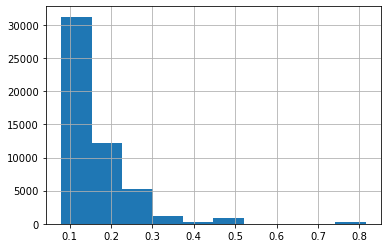

In [714]:
preds_train.prob.hist();

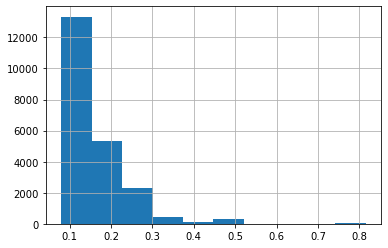

In [719]:
preds_test.prob.hist();

In [720]:
preds_train['predicted'] = modelo.predict(X_train)
preds_test['predicted']  = modelo.predict(X_test)

In [716]:
preds_train

prob  original_target  predicted
0      0.282144                0          0
1      0.079440                1          0
2      0.260799                0          0
3      0.091149                0          0
4      0.079440                0          0
...         ...              ...        ...
51162  0.282144                0          0
51163  0.091149                0          0
51164  0.079440                0          0
51165  0.079440                0          0
51166  0.079440                0          0

[51167 rows x 3 columns]

In [721]:
preds_test

prob  original_target  predicted
0      0.282144                0          0
1      0.158477                0          0
2      0.355932                0          0
3      0.079440                1          0
4      0.079440                0          0
...         ...              ...        ...
21924  0.158477                0          0
21925  0.168776                0          0
21926  0.079440                0          0
21927  0.103869                0          0
21928  0.129787                0          0

[21929 rows x 3 columns]

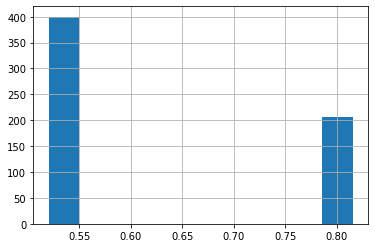

In [717]:
preds_train.query('predicted==1' ).prob.hist();

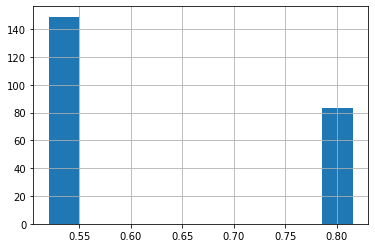

In [722]:
preds_test.query('predicted==1' ).prob.hist();

In [723]:
copy_train = customer_in_nodes_train.copy()
copy_test = customer_in_nodes_test.copy()

In [724]:
copy_train['node'] = np.NaN
copy_test['node']  = np.NaN
for col in copy_train.columns:
    copy_train.loc[copy_train[col] == 1, 'node'] = col
    copy_test.loc[copy_test[col] == 1, 'node'] = col

In [725]:
copy_train

13  25  37  17  31  20  38  24  36  39  32  33  19  40  27  35  30  34  \
0       0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   
1       1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2       0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
3       0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4       1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
51162   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   
51163   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
51164   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
51165   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
51166   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

       16  29  9  node  
0       0   0  0  19.0  
1       0   0  0  13.0  
2       0   0  0  33.0  
3       0   0  0  25.0  
4       0   0  0  13.0  
...    ..  .. ..   ...  
51162   0   0  0  19.0  
51163   0   0  0  25.0  
51164   0   0  0  13.0  
51165   0   0  0  13.0  
51166   0   0  0  13.0  

[51167 rows x 22 columns]

In [701]:
# Join con el DataFrame que tiene el ìndice del modelo.
preds_train['index_node'] = copy_train['node']

In [702]:
preds_train

prob  original_target  predicted index_node
0      0.282144                0          0       19.0
1      0.079440                1          0       13.0
2      0.260799                0          0       33.0
3      0.091149                0          0       25.0
4      0.079440                0          0       13.0
...         ...              ...        ...        ...
51162  0.282144                0          0       19.0
51163  0.091149                0          0       25.0
51164  0.079440                0          0       13.0
51165  0.079440                0          0       13.0
51166  0.079440                0          0       13.0

[51167 rows x 4 columns]

In [705]:
preds_train[preds_train.index_node == 9].original_target.value_counts()

1    168
0     38
Name: original_target, dtype: int64

In [726]:
# Second way
preds_test.loc[copy_test.index, 'index_node'] = copy_test['node']

In [727]:
preds_test

prob  original_target  predicted index_node
0      0.282144                0          0       19.0
1      0.158477                0          0       38.0
2      0.355932                0          0       35.0
3      0.079440                1          0       13.0
4      0.079440                0          0       13.0
...         ...              ...        ...        ...
21924  0.158477                0          0       38.0
21925  0.168776                0          0       24.0
21926  0.079440                0          0       13.0
21927  0.103869                0          0       37.0
21928  0.129787                0          0       20.0

[21929 rows x 4 columns]

In [728]:
preds_test[preds_test.index_node == 9].original_target.value_counts()

1    63
0    20
Name: original_target, dtype: int64

In [ ]:
X_test_copy = X_test.copy().reset_index()

In [729]:
X_test_copy[]

cedula  num_creditos  precio_equipo  monto_financiado  monto_abono  \
0      8-947-1936             1        290.000           203.000        87.00   
1       4-705-127             1        193.000           135.100        57.90   
2       8-829-982             1        235.400           176.550        58.85   
3       8-750-214             1        202.000           141.400        60.60   
4        8-878-56             1        204.000           142.800        61.20   
...           ...           ...            ...               ...          ...   
21924  8-828-1907             1        180.000           144.000        36.00   
21925   8-939-656             1        170.000           136.000        34.00   
21926  8-771-1259             2        162.195           113.535        48.66   
21927     8-728-5             1        130.000           104.000        26.00   
21928   1-735-393             1        355.000           248.500       106.50   

       cuotas  monto_cuota  tiene_info_buro  vintage_buro  score_apc  \
0        12.0        29.02                0           0.0        0.0   
1         8.0        25.11                0           0.0        0.0   
2        12.0        25.24                1        3275.0      480.0   
3        12.0        20.21                0           0.0        0.0   
4        12.0        20.41                0           0.0        0.0   
...       ...          ...              ...           ...        ...   
21924    12.0        20.59                1        1738.0      505.0   
21925    16.0        16.68                0           0.0        0.0   
21926    12.0        16.23                1        1233.0      613.0   
21927    12.0        14.87                0           0.0        0.0   
21928    16.0        30.47                1        1718.0      470.0   

       prob_incumplimiento  num_ref_canceladas  fallecido  \
0                     0.00                 0.0        0.0   
1                     0.00                 0.0        0.0   
2                    33.25                 0.0        0.0   
3                     0.00                 0.0        0.0   
4                     0.00                 0.0        0.0   
...                    ...                 ...        ...   
21924                27.25                 5.0        0.0   
21925                 0.00                 0.0        0.0   
21926                 9.85                 1.0        0.0   
21927                 0.00                 0.0        0.0   
21928                35.83                 0.0        0.0   

       num_dias_consultados  num_comercios_consultados  consultado_adelantos  \
0                       0.0                        0.0                   0.0   
1                       0.0                        0.0                   0.0   
2                       1.0                        2.0                   1.0   
3                       0.0                        0.0                   0.0   
4                       0.0                        0.0                   0.0   
...                     ...                        ...                   ...   
21924                   5.0                        2.0                   0.0   
21925                   0.0                        0.0                   0.0   
21926                   4.0                        2.0                   0.0   
21927                   0.0                        0.0                   0.0   
21928                   6.0                        3.0                   0.0   

       num_consultas_adelantos  consultado_krediya  num_consultas_krediya  \
0                          0.0                 0.0                    0.0   
1                          0.0                 0.0                    0.0   
2                          1.0                 1.0                    1.0   
3                          0.0                 0.0                    0.0   
4                          0.0                 0.0                    0.0   
...              

In [734]:
preds_train['cedula'] = np.NaN
#preds_test['cedula']  = np.NaN

preds_train.loc[X_train_copy.index, 'cedula'] = X_train_copy['cedula']
#preds_test.loc[X_test_copy.index, 'cedula'] = X_test_copy['cedula']

In [737]:
preds_train

prob  original_target  predicted       cedula
0      0.282144                0          0   8-971-2343
1      0.079440                1          0    8-709-646
2      0.260799                0          0  10-702-1403
3      0.091149                0          0    4-760-663
4      0.079440                0          0  8-1018-2388
...         ...              ...        ...          ...
51162  0.282144                0          0   8-735-2237
51163  0.091149                0          0   2-715-2405
51164  0.079440                0          0    8-771-232
51165  0.079440                0          0   4-739-1945
51166  0.079440                0          0    8-237-404

[51167 rows x 4 columns]

In [738]:
preds_test

prob  original_target  predicted index_node      cedula
0      0.282144                0          0       19.0  8-947-1936
1      0.158477                0          0       38.0   4-705-127
2      0.355932                0          0       35.0   8-829-982
3      0.079440                1          0       13.0   8-750-214
4      0.079440                0          0       13.0    8-878-56
...         ...              ...        ...        ...         ...
21924  0.158477                0          0       38.0  8-828-1907
21925  0.168776                0          0       24.0   8-939-656
21926  0.079440                0          0       13.0  8-771-1259
21927  0.103869                0          0       37.0     8-728-5
21928  0.129787                0          0       20.0   1-735-393

[21929 rows x 5 columns]

In [736]:
#Validar que estos 3 clientes son del nodo 9:
preds_test[preds_test.cedula.isin(
    ['8-525-1789', '8-848-1527','8-407-522']
    )]

prob  original_target  predicted index_node      cedula
423    0.815534                1          1        9.0  8-525-1789
1680   0.815534                1          1        9.0  8-848-1527
21902  0.815534                1          1        9.0   8-407-522

### 6.1. Guardando los reportes de clientes por nodo para Christian.

In [740]:
preds_train.to_parquet('../Data/reports/fraude/preds_train_tree_nodes.parquet')
preds_test.to_parquet('../Data/reports/fraude/preds_test_tree_nodes.parquet')

### Nuevos requerimientos de Javi. Esto es lo que se hizo para presentar el primer àrbol a Krediya
- Encima del mismo plot, el bad rate acumulado, 
-  Ordenar las tablas al revés. Le gustaría que se hiciera de menor a mayor. Para que fuera el cumulado de lo que se aprobaría
-  Luego, crear columna de % de población acumulada global
-  % de bad rate acumulado, en el eje X el porcentaje de las personas y eje y bad rate.


In [546]:
import pdb

def set_pre_approved_account(df):
    df['pre_approved_count'] = 0.0
    acum = 0.0
    for i in list(df.index):
        acum = acum + df.loc[[i]]['counts'].values[0]
        df.loc[df.index==i,'pre_approved_count'] = acum
    return df

def set_bad_rate_acum_global(df, X):
    df['bad_rate_cumulative_global'] = 0.0
    acum = 0.0
    count_all =  X.shape[0]
    for i in list(df.index):
        acum = acum + df.loc[[i]]['counts'].values[0]
        df.loc[df.index==i,'bad_rate_cumulative_global'] = acum/count_all
    return df

def set_bad_rate_acum_local(df):
    df['bad_rate_cumulative_local'] = 0.0
    acum_counts = 0.0
    acum_counts_bads   = 0.0
    for i in list(df.index):
        acum_counts = acum_counts + df.loc[[i]]['counts'].values[0]
        acum_counts_bads = acum_counts_bads + df.loc[[i]]['count_bads'].values[0]
        df.loc[df.index==i,'bad_rate_cumulative_local'] = acum_counts_bads/acum_counts
    return df

In [547]:
df_train = set_bad_rate_acum_global(df_train, X_train)
df_train = set_bad_rate_acum_local(df_train)
df_train = set_pre_approved_account(df_train)
df_train

index_node  counts  count_bads  bad_rate  bad_rate_cumulative_global  \
0          13   20292      1612.0  0.079440                    0.396584   
3          25    4553       415.0  0.091149                    0.485567   
4          37    2378       247.0  0.103869                    0.532042   
10         17     904       111.0  0.122788                    0.549710   
6          31    2170       279.0  0.128571                    0.592120   
9          20     940       122.0  0.129787                    0.610491   
2          38    5332       845.0  0.158477                    0.714699   
1          24    5688       960.0  0.168776                    0.825864   
17         36     323        56.0  0.173375                    0.832177   
11         39     854       158.0  0.185012                    0.848867   
12         32     628       147.0  0.234076                    0.861141   
8          33    1227       320.0  0.260799                    0.885121   
5          19    2201       621.0  0.282144                    0.928137   
7          40    1263       357.0  0.282660                    0.952821   
16         27     346       105.0  0.303468                    0.959583   
18         35     295       105.0  0.355932                    0.965349   
13         30     487       176.0  0.361396                    0.974867   
19         34     263       110.0  0.418251                    0.980007   
14         16     417       205.0  0.491607                    0.988156   
15         29     400       208.0  0.520000                    0.995974   
20          9     206       168.0  0.815534                    1.000000   

    bad_rate_cumulative_local  pre_approved_count  
0                    0.079440             20292.0  
3                    0.081586             24845.0  
4                    0.083532             27223.0  
10                   0.084794             28127.0  
6                    0.087929             30297.0  
9                    0.089189             31237.0  
2                    0.099292             36569.0  
1                    0.108645             42257.0  
17                   0.109136             42580.0  
11                   0.110628             43434.0  
12                   0.112387             44062.0  
8                    0.116408             45289.0  
5                    0.124089             47490.0  
7                    0.128197             48753.0  
16                   0.129432             49099.0  
18                   0.130785             49394.0  
13                   0.133037             49881.0  
19                   0.134533             50144.0  
14                   0.137478             50561.0  
15                   0.140480             50961.0  
20                   0.143198             51167.0

In [548]:
y_train.target.value_counts()

0    43840
1     7327
Name: target, dtype: int64

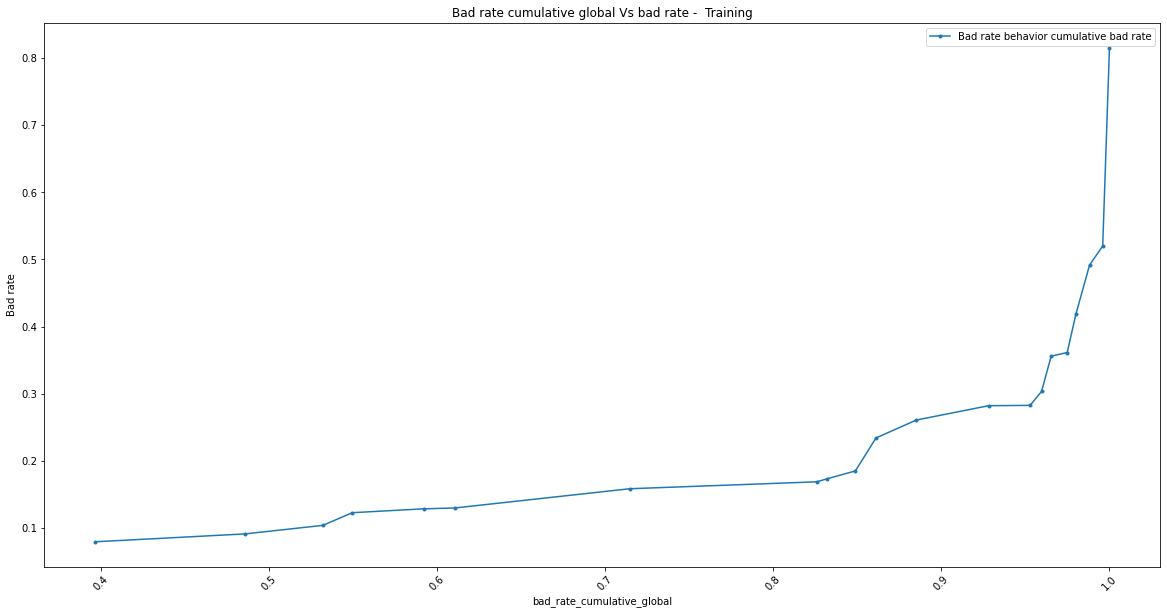

In [549]:
ax = df_train.plot(x='bad_rate_cumulative_global',y='bad_rate', label='Bad rate behavior cumulative bad rate', marker='.', figsize=(20, 10), rot=45);
plt.xlabel("bad_rate_cumulative_global")
plt.ylabel("Bad rate")
#ax.set_xticks(range(22));
#ax.set_xticklabels(df_train['bad_rate_cumulative_global'], rotation=90);
plt.legend();
plt.title("Bad rate cumulative global Vs bad rate -  Training");

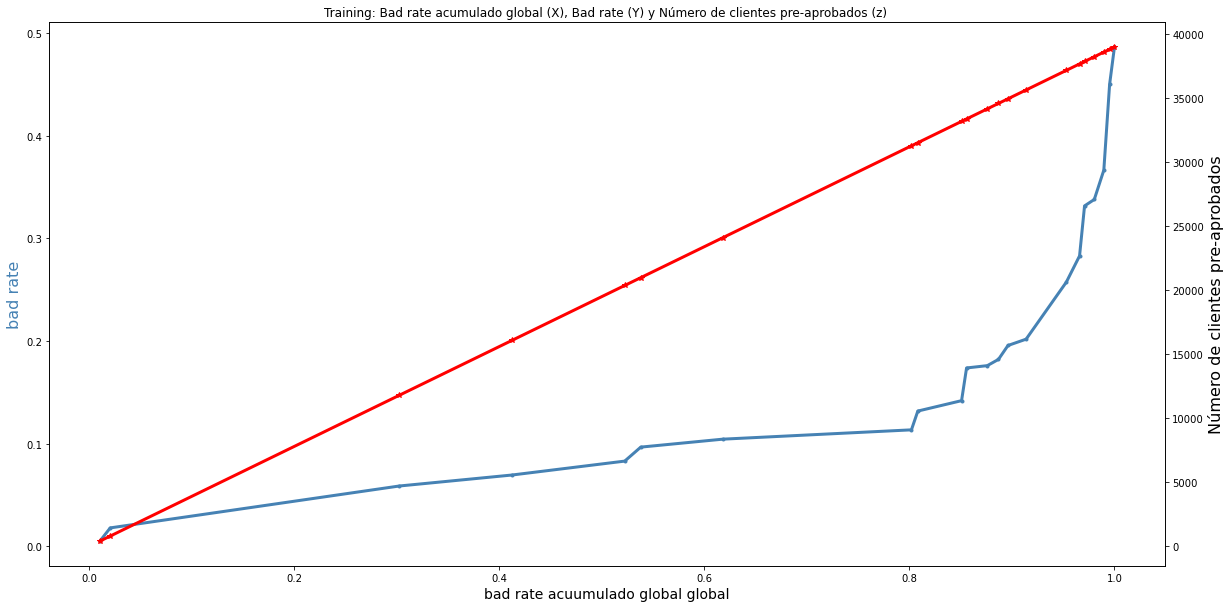

In [499]:
#define colors to use
col1 = 'steelblue'
col2 = 'red'

#define subplots
fig,ax = plt.subplots(figsize=(20, 10))

#add first line to plot
ax.plot(df_train.bad_rate_cumulative_global, df_train.bad_rate, color=col1, marker='.',  linewidth=3)

#add x-axis label
ax.set_xlabel('bad rate acuumulado global global', fontsize=14)

#add y-axis label
ax.set_ylabel('bad rate', color=col1, fontsize=16)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(df_train.bad_rate_cumulative_global, df_train.pre_approved_count, marker='*', color= col2,  linewidth=3)

#add second y-axis label
ax2.set_ylabel('Número de clientes pre-aprobados', fontsize=16)

plt.title("Training: Bad rate acumulado global (X), Bad rate (Y) y Número de clientes pre-aprobados (z) ");

In [ ]:
a=10

### Test

In [399]:
test_data =( 
    pd.DataFrame(columns=['index_node', 'target'],
    data={'index_node':list(modelo.apply(X_test)),
          'target':y_test.target.values})
           )

In [400]:
test_data

index_node  target
0              20     0.0
1              16     0.0
2              33     0.0
3              33     1.0
4              12     0.0
...           ...     ...
16706          33     0.0
16707          42     0.0
16708          33     0.0
16709          33     0.0
16710          36     0.0

[16711 rows x 2 columns]

In [401]:
only_good =  test_data[test_data.target==1.0]
only_good.index_node.value_counts()

36    367
33    302
25    185
41    147
35    133
42    125
20    100
30     60
16     58
38     54
22     53
27     49
14     43
40     40
37     33
39     25
12     25
29     25
26     14
32      7
31      6
Name: index_node, dtype: int64

## No hay gente mala de test en el nodo 24. !!!!

In [417]:
only_bads = test_data[test_data.target==1.0]
only_bads

index_node  target
3              33     1.0
6              25     1.0
11             36     1.0
18             36     1.0
24             42     1.0
...           ...     ...
16694          16     1.0
16699          33     1.0
16700          40     1.0
16703          36     1.0
16705          35     1.0

[1851 rows x 2 columns]

In [418]:
test_nodes = (only_bads.groupby(by=['index_node'])
         .size()
         .rename_axis('index_node')
         .reset_index(name='count_bads')
             )
test_nodes= test_nodes.set_index('index_node')
test_nodes.shape

(21, 1)

In [419]:
df_test = (pd.DataFrame(modelo
                .apply(X_test, check_input=True))
                .value_counts()
                .rename_axis('index_node')
                .reset_index(name='counts')
          )
df_test.head(2)

index_node  counts
0          33    4782
1          36    3077

In [420]:
df_test = df_test.set_index('index_node')
df_test.head(2)

counts
index_node        
33            4782
36            3077

In [421]:
df_test = df_test.join(test_nodes[['count_bads']], how='inner')
df_test = df_test.reset_index()
df_test.head(2)

index_node  counts  count_bads
0          33    4782         302
1          36    3077         367

In [423]:
df_test['bad_rate'] = df_test.count_bads/df_test.counts
df_test.shape

(21, 4)

In [424]:
df_test=df_test.sort_values(by=['bad_rate'], ascending=True)
df_test.index_node = df_test.index_node.astype(str)
df_test.head(2)

index_node  counts  count_bads  bad_rate
15         31     140           6  0.042857
0          33    4782         302  0.063153

In [500]:
df_test = set_bad_rate_acum_global(df_test, X_test)
df_test = set_bad_rate_acum_local(df_test)
df_test = set_pre_approved_account(df_test)
df_test.head(3)

index_node  counts  count_bads  bad_rate  bad_rate_cumulative_global  \
15         31     140           6  0.042857                    0.008378   
0          33    4782         302  0.063153                    0.294537   
3          42    1819         125  0.068719                    0.403387   

    bad_rate_cumulative_local  pre_approved_count  
15                   0.042857               140.0  
0                    0.062576              4922.0  
3                    0.064234              6741.0

In [501]:
df_test

index_node  counts  count_bads  bad_rate  bad_rate_cumulative_global  \
15         31     140           6  0.042857                    0.008378   
0          33    4782         302  0.063153                    0.294537   
3          42    1819         125  0.068719                    0.403387   
2          35    1911         133  0.069597                    0.517743   
18         32      77           7  0.090909                    0.522351   
9          12     258          25  0.096899                    0.537789   
4          41    1346         147  0.109212                    0.618335   
1          36    3077         367  0.119272                    0.802465   
5          20     677         100  0.147710                    0.842978   
7          27     327          49  0.149847                    0.862546   
17         26      87          14  0.160920                    0.867752   
13         29     154          25  0.162338                    0.876967   
10         37     203          33  0.162562                    0.889115   
8          16     289          58  0.200692                    0.906409   
11         38     196          54  0.275510                    0.918138   
6          25     649         185  0.285054                    0.956974   
20         39      73          25  0.342466                    0.961343   
12         30     173          60  0.346821                    0.971695   
14         22     145          53  0.365517                    0.980372   
16         14      98          43  0.438776                    0.986237   
19         40      77          40  0.519481                    0.990844   

    bad_rate_cumulative_local  pre_approved_count  
15                   0.042857               140.0  
0                    0.062576              4922.0  
3                    0.064234              6741.0  
2                    0.065418              8652.0  
18                   0.065643              8729.0  
9                    0.066541              8987.0  
4                    0.072099             10333.0  
1                    0.082923             13410.0  
5                    0.086037             14087.0  
7                    0.087484             14414.0  
17                   0.087925             14501.0  
13                   0.088707             14655.0  
10                   0.089716             14858.0  
8                    0.091833             15147.0  
11                   0.094180             15343.0  
6                    0.101926             15992.0  
20                   0.103019             16065.0  
12                   0.105616             16238.0  
14                   0.107917             16383.0  
16                   0.109884             16481.0  
19                   0.111789             16558.0

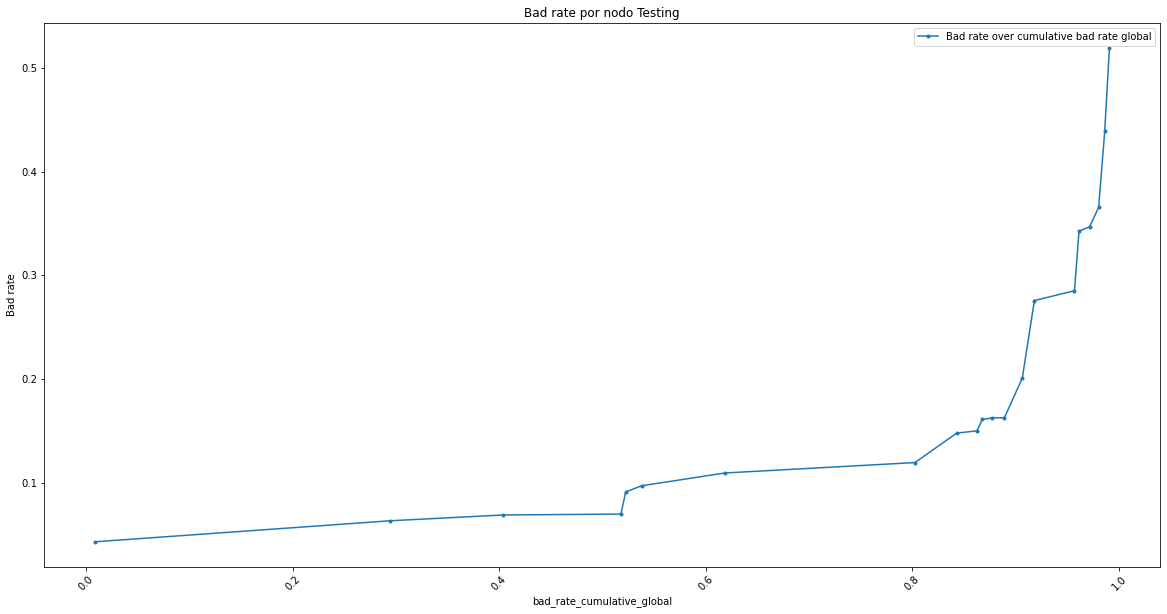

In [473]:
ax = df_test.plot(x='bad_rate_cumulative_global',y='bad_rate', label='Bad rate over cumulative bad rate global', marker='.', figsize=(20, 10), rot=45);
plt.xlabel("bad_rate_cumulative_global")
plt.ylabel("Bad rate")
#ax.set_xticks(range(21));
#ax.set_xticklabels(df_test['index_node'], rotation=90);
plt.legend();
plt.title("Bad rate por nodo Testing");

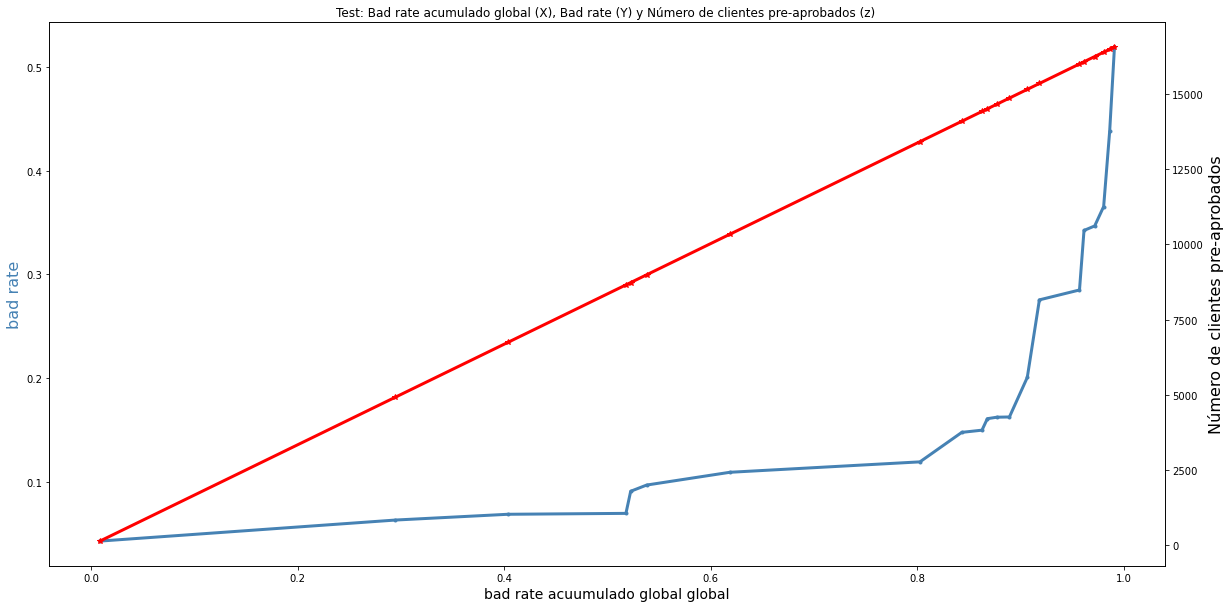

In [502]:
#define colors to use
col1 = 'steelblue'
col2 = 'red'

#define subplots
fig,ax = plt.subplots(figsize=(20, 10))

#add first line to plot
ax.plot(df_test.bad_rate_cumulative_global, df_test.bad_rate, color=col1, marker='.',  linewidth=3)

#add x-axis label
ax.set_xlabel('bad rate acuumulado global global', fontsize=14)

#add y-axis label
ax.set_ylabel('bad rate', color=col1, fontsize=16)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(df_test.bad_rate_cumulative_global, df_test.pre_approved_count, marker='*', color= col2,  linewidth=3)

#add second y-axis label
ax2.set_ylabel('Número de clientes pre-aprobados', fontsize=16)

plt.title("Test: Bad rate acumulado global (X), Bad rate (Y) y Número de clientes pre-aprobados (z) ");

## Plotting Train and testing

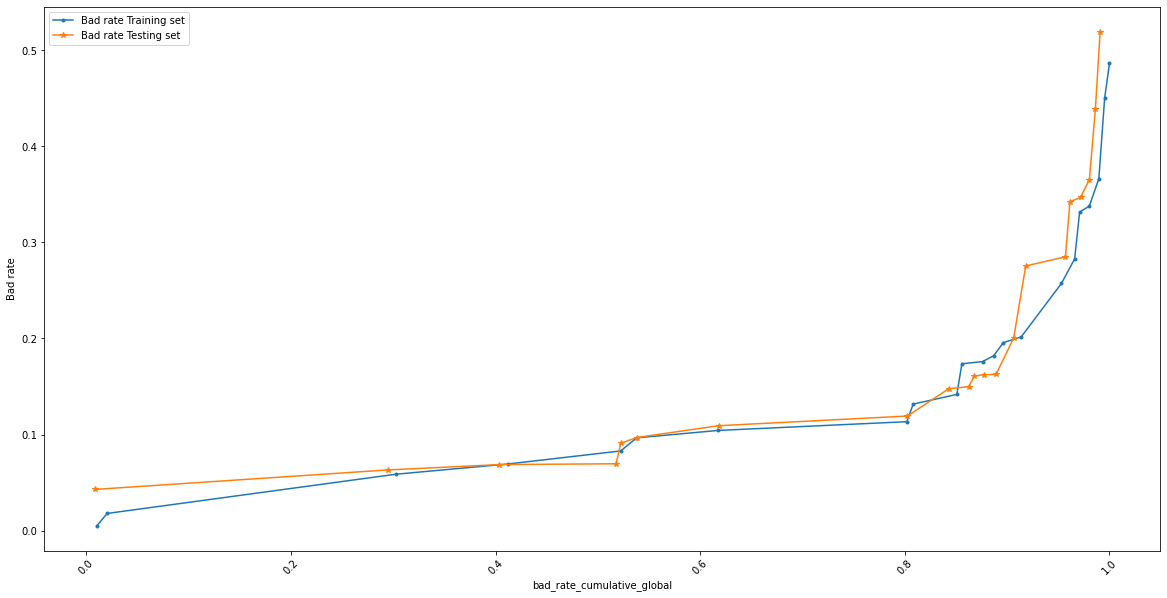

In [461]:
ax = df_train.plot(x='bad_rate_cumulative_global',y='bad_rate', label='Bad rate Training set', marker='.', figsize=(20, 10), rot=45);
df_test.plot(ax=ax, x='bad_rate_cumulative_global',y='bad_rate', label='Bad rate Testing set', marker='*', figsize=(20, 10), rot=45);
plt.xlabel("bad_rate_cumulative_global")
plt.ylabel("Bad rate")
#ax.set_xticks(range(22));
#ax.set_xticklabels(df_train['index_node'], rotation=90);
plt.legend();
plt.show();

In [457]:
df_train

index_node  counts  count_bads  bad_rate  bad_rate_cumulative_global  \
12         24     400         2.0  0.005000                    0.010259   
13         31     392         7.0  0.017857                    0.020313   
0          33   10994       645.0  0.058668                    0.302283   
3          42    4282       297.0  0.069360                    0.412106   
2          35    4293       356.0  0.082926                    0.522211   
9          12     611        59.0  0.096563                    0.537882   
4          41    3116       325.0  0.104300                    0.617799   
1          36    7179       814.0  0.113386                    0.801924   
17         26     243        32.0  0.131687                    0.808156   
5          20    1664       236.0  0.141827                    0.850834   
19         32     190        33.0  0.173684                    0.855707   
7          27     790       139.0  0.175949                    0.875968   
11         37     423        77.0  0.182033                    0.886817   
15         29     363        71.0  0.195592                    0.896127   
8          16     689       139.0  0.201742                    0.913798   
6          25    1531       394.0  0.257348                    0.953065   
10         38     502       142.0  0.282869                    0.965940   
20         39     190        63.0  0.331579                    0.970813   
14         30     370       125.0  0.337838                    0.980303   
16         22     363       133.0  0.366391                    0.989613   
18         14     220        99.0  0.450000                    0.995255   
21         40     185        90.0  0.486486                    1.000000   

    bad_rate_cumulative_local  
12                   0.005000  
13                   0.011364  
0                    0.055490  
3                    0.059186  
2                    0.064191  
9                    0.065134  
4                    0.070201  
1                    0.080116  
17                   0.080514  
5                    0.083590  
19                   0.084103  
7                    0.086227  
11                   0.087399  
15                   0.088523  
8                    0.090713  
6                    0.097578  
10                   0.100048  
20                   0.101210  
14                   0.103501  
16                   0.105974  
18                   0.107924  
21                   0.109720

In [438]:
df_test

index_node  counts  count_bads  bad_rate  bad_rate_cumulative_global  \
15         31     140           6  0.042857                    0.008378   
0          33    4782         302  0.063153                    0.294537   
3          42    1819         125  0.068719                    0.403387   
2          35    1911         133  0.069597                    0.517743   
18         32      77           7  0.090909                    0.522351   
9          12     258          25  0.096899                    0.537789   
4          41    1346         147  0.109212                    0.618335   
1          36    3077         367  0.119272                    0.802465   
5          20     677         100  0.147710                    0.842978   
7          27     327          49  0.149847                    0.862546   
17         26      87          14  0.160920                    0.867752   
13         29     154          25  0.162338                    0.876967   
10         37     203          33  0.162562                    0.889115   
8          16     289          58  0.200692                    0.906409   
11         38     196          54  0.275510                    0.918138   
6          25     649         185  0.285054                    0.956974   
20         39      73          25  0.342466                    0.961343   
12         30     173          60  0.346821                    0.971695   
14         22     145          53  0.365517                    0.980372   
16         14      98          43  0.438776                    0.986237   
19         40      77          40  0.519481                    0.990844   

    bad_rate_cumulative_local  
15                   0.042857  
0                    0.062576  
3                    0.064234  
2                    0.065418  
18                   0.065643  
9                    0.066541  
4                    0.072099  
1                    0.082923  
5                    0.086037  
7                    0.087484  
17                   0.087925  
13                   0.088707  
10                   0.089716  
8                    0.091833  
11                   0.094180  
6                    0.101926  
20                   0.103019  
12                   0.105616  
14                   0.107917  
16                   0.109884  
19                   0.111789